# Вступление

Приветсвую тех, кто заглнянул сюда, в мой ноутбук!
Как вы наверное поняли из названия моего репозитория/датасета с Kaggle это ноутбук, посвященный анализу стендов из аниме "Невероятные приключения ДжоДжо"

Сначала немного контекста:

Стенд -- это физическое проявление "жизненной энергии" человека, его сильный дух

У стендов есть характеристики:

- **Разрушительная сила**: Измеряет силу стенда и его способность вызвать разрушения (физические повреждения или сопутствующий ущерб окружающей среде) за определенный период времени.

- **Скорость**: Измеряет ловкость и рефлексы стенда, а также скорость выполнения.

- **Радиус**: Измеряет компромисс диапазона проявления стенда, диапазон влияния способностей и пространственную мобильность.

- **Выносливость**: Измеряет продолжительность времени, в течение которого стенд может активно поддерживать свою способность. Стенды дальней дистанции, способные работать удаленно от своих пользователей, такие как Lovers и Empress, описываются как обладающие высокой выносливостью. Это также относится к материализованным стендам, такие как Yellow Temperance и Atom Heart Father, которые могут привязываться к объектам на длительное время.

- **Точность**: Измеряет точность стенда и радиус воздействия/эффекта его способностей на указанные цели. Стенды автоматического типа обычно оцениваются по рангу D или ниже, за некоторыми исключениями.

- **Потенциал развития**: Измеряет возможные функции стенда, использование его способностей и сил, а также способность улучшить его общие возможности. Ранг уменьшается по мере того, как пользователь осваивает свой стенд.

Пример описания характеристики стенда:

<div style="text-align:center"> 

<img src="https://pm1.aminoapps.com/6955/8540d06f69c1111b7bae390fb9b66effe3809d46r1-1080-1017v2_hq.jpg" alt="drawing" width="200"/>

</div>

Зная это, приступим к анализу данного датасета и найдем что-нибудь интересное!

<div style="text-align:center"> 

![Ой, Джоске](https://avatars.dzeninfra.ru/get-zen_doc/3680683/pub_62dfb5f901cd0904a73542c1_62dfbe04c58eaf42ac4bd2fe/orig)


# 1 часть -- Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt
import plotly.express as px
 

from IPython.display import Image, display
 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2 часть -- Начало анализа, первый взгялд на данные

In [2]:
begin_dataset = pd.read_csv('JoJo_Bizarre_Adventure_All_Stands_Stats.csv')

# Выведем 10 случайных строк, чтобы посмотреть на датасет
display(begin_dataset.sample(10))

display(begin_dataset.info())

display(begin_dataset[
    begin_dataset['Stand'].str.startswith('Star')
])

,Stand,PWR,SPD,RNG,STA,PRC,DEV,Story
24,Silver Chariot,C,A,C,B,B,C,Part 3: Stardust Crusaders
131,Tatoo You!,undefined,E,C,B,E,E,Part 7: Steel Ball Run
122,Cream Starter,D,C,C,A,E,B,Part 7: Steel Ball Run
95,Under World,undefined,C,A,C,undefined,undefined,Part 6: Stone Ocean
143,Nut King Call,C,D,C,A,E,A,Part 8: JoJolion
134,Tubular Bells,D,D,D,A,E,B,Part 7: Steel Ball Run
20,Hierophant Green,C,B,A,B,C,D,Part 3: Stardust Crusaders
27,Sun,B,E,A,A,E,E,Part 3: Stardust Crusaders
120,Chocolate Disco,undefined,C,C,B,A,D,Part 7: Steel Ball Run
129,Scary Monsters,B,B,D,A,C,B,Part 7: Steel Ball Run


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Stand   156 non-null    object
 1   PWR     156 non-null    object
 2   SPD     156 non-null    object
 3   RNG     156 non-null    object
 4   STA     156 non-null    object
 5   PRC     156 non-null    object
 6   DEV     156 non-null    object
 7   Story   156 non-null    object
dtypes: object(8)
memory usage: 9.9+ KB


None

,Stand,PWR,SPD,RNG,STA,PRC,DEV,Story
25,Star Platinum,A,A,C,A,A,A,Part 3: Stardust Crusaders
97,Star Platinum,A,A,C,A,A,undefined,Part 6: Stone Ocean
98,Star Platinum: The World,A,A,C,E,A,C,Part 6: Stone Ocean


# 2.1 -- Части ДжоДжо

Сначала я хочу переимновать колонки статистики для удобства, а также очень хочу посмотреть, сколько у нас есть частей всего (сколько уникальных значений в колонке Story)

In [3]:
# Переименуем колнки
dict_to_replace = {'PWR': 'Сила', 
                   'SPD': 'Скорость',
                   'RNG': 'Дальность',
                   'STA': 'Выносливость',
                   'PRC': 'Точность',
                   'DEV': 'Потенциал'}

begin_dataset.rename(columns=dict_to_replace, inplace=True)

display(begin_dataset)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
0,Anubis,B,B,E,A,E,C,Part 3: Stardust Crusaders
1,Atum,D,C,D,B,D,D,Part 3: Stardust Crusaders
2,Bastet,E,E,B,A,E,E,Part 3: Stardust Crusaders
3,Cream,B,B,D,C,C,D,Part 3: Stardust Crusaders
4,Death Thirteen,C,C,E,B,D,B,Part 3: Stardust Crusaders
...,...,...,...,...,...,...,...,...
151,Nightbird Flying,E,A,A,A,E,E,Light Novel: Purple Haze Feedback
152,Purple Haze Distortion,A,B,E,E,C,unknown,Light Novel: Purple Haze Feedback
153,Rainy Day Dream Away,E,B,A,A,E,E,Light Novel: Purple Haze Feedback
154,Remote Romance,E,D,infinite,B,C,E,Featured


Теперь посмотрим сначала на то, какие у нас есть части данного аниме, а также посмотрим на распределение характеристик, чтобы понять общую картину

In [4]:
parts_of_jojo = begin_dataset.value_counts('Story')
print(parts_of_jojo)

Story
Part 3: Stardust Crusaders           33
Part 5: Vento Aureo                  29
Part 4: Diamond is Unbreakable       28
Part 6: Stone Ocean                  26
Part 7: Steel Ball Run               24
Light Novel: Purple Haze Feedback     7
Part 8: JoJolion                      7
Featured                              2
Name: count, dtype: int64


Что ж, по крайней мере, я дошел до Stone Ocean, так что я думаю, что большинство стендов мне будет знакомо :)

Большинство стендов находятся в 3 части, это круто, так как нас только знакомили с ними в этом сезоне

Меньше всего стендов находятся в "Featured", честно, сам не знаю, что это такое, так что в теории можно вывести эти стенды и посмотреть на них получше, может я что-нибудь да вспомню

## 2.2 -- Стенды из главы "Featured"

In [5]:
featured_part = begin_dataset[begin_dataset['Story'] == 'Featured']

display(featured_part)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
154,Remote Romance,E,D,infinite,B,C,E,Featured
155,House of Holy,E,B,C,A,D,D,Featured


Я узнал про эти стенды подробнее и оказывается, что **Remote Romance** -- это стенд, разработанный Хирохико Араки (создатель ДжоДжо) для выставки JoJo 2012. Его целью было продвижение художественной выставки через Интернет в прямом эфире.


<div style="text-align:center"> 

<img src="https://static.wikia.nocookie.net/jjba/images/3/32/Remote_Romance.png/revision/latest?cb=20170309021209" alt="drawing" width="200"/>

</div>

Подробнее про **Remote Romance** можете почитать [здесь](https://jojo.fandom.com/ru/wiki/Remote_Romance)

Так что этого стенда и не было в аниме/манге


Теперь узнаем про **House of Holy**. С ним очень интересно все -- это стенд-отель-лабиринт и у него нет внешнего вида, его опасность заключается в том, что любой, кто войдет в отель -- сразу окажется в лабиринте и в течение часа надо найти выход, если человек не найдет выход, то он пропадет в лабиринте навсегда. Любой физический урон неэффективен. 

[Подробнее про сам стенд](https://jojo.fandom.com/ru/wiki/House_of_Holy)

Также он фигурировал в специальной квест-игре, где участники в Японии должны решить загадки владельца стенда и выбраться из лабиринта

[Подробнее про квест-игру](https://jojo.fandom.com/ru/wiki/JoJo%27s_Bizarre_Escape:_The_Hotel)

Можно предположить, что этот стенд появляется в 3 части и его владелец является приспешником Дио (о нем позже поговорим)

## 2.3 -- Общее распределение характеристик

### 2.3.1 -- Сила

Теперь рассмотрим общее распределение характреристик стендов и поймем, стендов каких типов по качеству характеристик (A-E) больше всего

In [6]:
power_stats = begin_dataset['Сила'].value_counts()

display(power_stats)

Сила
E            35
A            32
C            27
B            26
D            17
undefined    16
unknown       2
infinite      1
Name: count, dtype: int64

Давайте, чтобы не путаться, мы будем обозначать характеристики цифрами (от 1 до 5), соответственно, это у нас будет (E-A)

In [7]:
replace_stat_dict = {'A': 5,
                     'B': 4,
                     'C': 3,
                     'D': 2,
                     'E': 1}

dataset_columns = begin_dataset.columns[1:-1]

for i in dataset_columns:
    begin_dataset[i].replace(replace_stat_dict, inplace = True)

display(begin_dataset)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders
...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback
154,Remote Romance,1,2,infinite,4,3,1,Featured


Посмотрим еще раз

In [8]:
power_stats = begin_dataset['Сила'].value_counts()

display(power_stats)

Сила
1            35
5            32
3            27
4            26
2            17
undefined    16
unknown       2
infinite      1
Name: count, dtype: int64

Как видно, у нас большинство стендов -- слабые по силе *(1)*, но также много и очень сильных *(5)*


Также у нас есть такие параметры, как неопределено, неизвестно и бесконечно

**Бесконечно** понятно, бесконечная мощь, непобедимый по силе, у нас такой только 1 стенд, давайте посмотрим, кто это может быть


In [9]:
inf_power_stand = begin_dataset[begin_dataset['Сила'] == 'infinite']

display(inf_power_stand)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo


А, ну тогда понятно, да, действительно, у нас только один **Gold Experience Requiem** (GER) настолько сильный :)

Бесконечное все -- непобедимый стенд, действительно

<p align="center">
    <img src="https://steamuserimages-a.akamaihd.net/ugc/775103339591880851/0452250037714568022DC0681A3AD2704C721D54/?imw=5000&amp;imh=5000&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=false" alt="Gold Experience Requiem 1" width="300">
</p>

<p align="center">
    <img src="https://i.pinimg.com/originals/6a/cc/c6/6accc6d646fb378c932fcd2b73e16307.png" alt="Gold Experience Requiem 2" width="300">
</p>

<p align="center">
    <img src="https://steamuserimages-a.akamaihd.net/ugc/5108802431775556322/46F42EC084464AA428E7703388BA664F0A560A9C/?imw=512&amp;imh=287&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true" alt="Gold Experience Requiem 3" width="300">
</p>


Рассмотрим теперь стенды с пометкой *undefined* и *unknown* и решим, они все таки сильные или слабые

In [10]:
unknown_stands = begin_dataset[
    begin_dataset['Сила'] == 'unknown'
]

undefined_stands = begin_dataset[
    begin_dataset['Сила'] == 'undefined'
]

display(unknown_stands)
display(undefined_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
90,Whitesnake,unknown,2,unknown,5,unknown,unknown,Part 6: Stone Ocean
104,"Green, Green Grass of Home",unknown,unknown,unknown,unknown,unknown,unknown,Part 6: Stone Ocean


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
85,Rolling Stones,undefined,4,5,5,1,undefined,Part 5: Vento Aureo
91,C-Moon,undefined,4,4,unknown,unknown,unknown,Part 6: Stone Ocean
92,Jail House Lock,undefined,3,4,5,undefined,undefined,Part 6: Stone Ocean
95,Under World,undefined,3,5,3,undefined,undefined,Part 6: Stone Ocean
96,Sky High,undefined,undefined,4,3,undefined,undefined,Part 6: Stone Ocean
99,Bohemian Rhapsody,undefined,undefined,infinite,5,undefined,undefined,Part 6: Stone Ocean
100,Burning Down the House,undefined,undefined,undefined,undefined,undefined,undefined,Part 6: Stone Ocean
102,Dragon's Dream,undefined,undefined,undefined,5,undefined,undefined,Part 6: Stone Ocean
108,Limp Bizkit,undefined,4,4,5,3,1,Part 6: Stone Ocean
116,20th Century Boy,undefined,3,undefined,5,2,3,Part 7: Steel Ball Run


Ну... В теории можно построить график распределения и +- случайно распределить параметры, на основе существующих данных. Допустим, мы присвоим 1 с такой вероятностью, 2 с другой и т.д

Алгоритм примерно следующий:

находим сколько стендов имеют силу 1, например, и делим на общее количество стендов

In [11]:
done_values_power = begin_dataset[
    (begin_dataset['Сила'] != 'undefined') & (begin_dataset['Сила'] != 'unknown') & (begin_dataset['Сила'] != 'infinite')
]

done_values_power_piv = done_values_power.value_counts('Сила').reset_index()
print(done_values_power_piv)

power_stats_histogram = px.histogram(done_values_power_piv, x = 'Сила', y = 'count', nbins = 8, color_discrete_sequence=['#f40b12'])
power_stats_histogram.update_layout(title = {'text': 'Распределение силы', 'x': 0.5}, showlegend = False, xaxis_title = 'Сила', yaxis_title = 'Количество')
power_stats_histogram.show()




   Сила  count
0     1     35
1     5     32
2     3     27
3     4     26
4     2     17


In [12]:
additional_done_values_power = done_values_power.value_counts('Сила').reset_index().rename(columns = {'count': 'Кол-во'})

additional_done_values_power['probability'] = additional_done_values_power['Кол-во'] / additional_done_values_power['Кол-во'].sum()

display(additional_done_values_power)

,Сила,Кол-во,probability
0,1,35,0.255474
1,5,32,0.233577
2,3,27,0.197080
3,4,26,0.189781
4,2,17,0.124088


Теперь, имея данные вероятности, мы можем заполнить наши значения

In [13]:
stands_to_be_replaced = begin_dataset[
    (begin_dataset['Сила'] == 'unknown') | (begin_dataset['Сила'] == 'undefined')
]

def replace_empty_power(row):
    row['Сила'] = np.random.choice(additional_done_values_power['Сила'], p = additional_done_values_power['probability'])
    return row['Сила']

stands_to_be_replaced['Сила'] = stands_to_be_replaced.apply(replace_empty_power, axis = 1)

begin_dataset.loc[stands_to_be_replaced.index, 'Сила'] = stands_to_be_replaced['Сила']

display(begin_dataset)

display(begin_dataset.value_counts('Сила').reset_index())


C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\1309006916.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders
...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback
154,Remote Romance,1,2,infinite,4,3,1,Featured


,Сила,count
0,1,39
1,5,35
2,3,32
3,4,29
4,2,20
5,infinite,1


Предположим, что стенды с силой 3 и больше, а также таинственный стенд, у которого сила бесконечна -- сильные, остальные -- слабые, тогда давайте отобразим их распределение на круговой диаграмме (как раз будут хорошие категории)

In [14]:
def assign_strongest_stands(row):
    if row['Сила'] == 'infinite' or row['Сила'] >= 3:
        row['strong'] = 'Сильный стенд'
    else:
        row['strong'] = 'Слабый стенд'
    return row['strong']

begin_dataset['strong'] = begin_dataset.apply(assign_strongest_stands, axis = 1)



In [15]:
pivot_strong_stands = begin_dataset.value_counts('strong').reset_index().rename(columns = {'count': 'Количество'})

display(pivot_strong_stands)

strong_stands_pie = px.pie(pivot_strong_stands, names='strong', values='Количество', width = 500, height = 500, hole = 0.5, color_discrete_sequence=['#db2724', '#24d8db'])
strong_stands_pie.update_layout(title = {'text': 'Распределение стендов по силе', 'x': 0.5}, showlegend = False)
strong_stands_pie.show()




,strong,Количество
0,Сильный стенд,97
1,Слабый стенд,59


Все равно по распределению видно, что у нас **больше именно сильных стендов**

### 2.3.2 -- Скорость

Теперь посмотрим, что там по скорости стендов

In [16]:
speed_stats = begin_dataset['Скорость'].value_counts()

display(speed_stats)

Скорость
4            41
3            35
5            29
1            27
2            14
undefined     6
infinite      3
unknown       1
Name: count, dtype: int64

Как видно, у нас почти очень быстрые стенды получились, причем медленных прямо мало

Посмотрим на стенды underfined и unknown

In [17]:
display(begin_dataset[(begin_dataset['Скорость'] == 'undefined') | (begin_dataset['Скорость'] == 'unknown')])

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong
96,Sky High,3,undefined,4,3,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
99,Bohemian Rhapsody,1,undefined,infinite,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд
100,Burning Down the House,3,undefined,undefined,undefined,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
102,Dragon's Dream,5,undefined,undefined,5,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
104,"Green, Green Grass of Home",4,unknown,unknown,unknown,unknown,unknown,Part 6: Stone Ocean,Сильный стенд
141,California King Bed,5,undefined,1,4,1,1,Part 8: JoJolion,Сильный стенд
144,Paisley Park,4,undefined,5,5,2,3,Part 8: JoJolion,Сильный стенд


Поступим с такими значениями скорости точно также, как и с силой, просто распределим остальные параеметры на основе имеющихся

In [18]:
stands_speed_stats = begin_dataset[
    (begin_dataset['Скорость'] != 'undefined') & (begin_dataset['Скорость'] != 'unknown') & (begin_dataset['Скорость'] != 'infinite')
]

display(stands_speed_stats)



,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд
...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback,Сильный стенд
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд


Построим график распределения

In [19]:
pivot_speed_stands = stands_speed_stats.value_counts('Скорость').reset_index()

display(pivot_speed_stands)

stands_speed_histogram = px.histogram(pivot_speed_stands, x = 'Скорость', y = 'count', nbins = 8, color_discrete_sequence=['#36e619'])

stands_speed_histogram.show()

,Скорость,count
0,4,41
1,3,35
2,5,29
3,1,27
4,2,14


In [20]:
sum_speed = pivot_speed_stands['count'].sum()

pivot_speed_stands['probability'] = pivot_speed_stands['count'] / sum_speed

display(pivot_speed_stands)

,Скорость,count,probability
0,4,41,0.280822
1,3,35,0.239726
2,5,29,0.198630
3,1,27,0.184932
4,2,14,0.095890


In [21]:
stands_speed_to_replace = begin_dataset[(begin_dataset['Скорость'] == 'undefined') | (begin_dataset['Скорость'] == 'unknown')]

display(stands_speed_to_replace)

def replace_speed(row):
    if row['Скорость'] == 'undefined' or row['Скорость'] == 'unknown':
        row['Скорость'] = np.random.choice(pivot_speed_stands['Скорость'], p = pivot_speed_stands['probability'])
    return row['Скорость']

stands_speed_to_replace['Скорость'] = stands_speed_to_replace.apply(replace_speed, axis = 1)

begin_dataset.loc[stands_speed_to_replace.index, 'Скорость'] = stands_speed_to_replace['Скорость']

display(begin_dataset)

display(begin_dataset.value_counts('Скорость').reset_index())

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong
96,Sky High,3,undefined,4,3,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
99,Bohemian Rhapsody,1,undefined,infinite,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд
100,Burning Down the House,3,undefined,undefined,undefined,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
102,Dragon's Dream,5,undefined,undefined,5,undefined,undefined,Part 6: Stone Ocean,Сильный стенд
104,"Green, Green Grass of Home",4,unknown,unknown,unknown,unknown,unknown,Part 6: Stone Ocean,Сильный стенд
141,California King Bed,5,undefined,1,4,1,1,Part 8: JoJolion,Сильный стенд
144,Paisley Park,4,undefined,5,5,2,3,Part 8: JoJolion,Сильный стенд


C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\2724405903.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд
...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback,Сильный стенд
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд


,Скорость,count
0,4,42
1,3,37
2,5,31
3,1,28
4,2,15
5,infinite,3


У нас появились 3 стенда с бесконечной скоростью, интересно, посмотрим на них

In [22]:
infinite_speed_stands = begin_dataset[
    begin_dataset['Скорость'] == 'infinite'
]

display(infinite_speed_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo,Сильный стенд
83,Notorious B.I.G,5,infinite,infinite,infinite,1,5,Part 5: Vento Aureo,Сильный стенд
109,Made in Heaven,4,infinite,3,5,3,5,Part 6: Stone Ocean,Сильный стенд


Тут у нас уже знакомый GER (Gold Experience Requiem)

Также у нас здесь есть **Notorius B.I.G**, да, это поистине устрашающий стенд, несмотря на то, что его обладатель умер, стенд продолжает преследовать все вокруг, подстраивается под пространство и поглощает абсолютно все. Скорость зависит от того, кого он преслудует. будет преследовать улитку -- будет двигаться со скоростью чуть большей улитики, будет преследовать самолет -- значит будет двигаться быстрее самолета

<p align="center">
    <img src="https://i.ytimg.com/vi/qvk0zrIqm4w/maxresdefault.jpg" alt="Да... Страшный стенд" height = "200", width="400">
</p>

Про **Made in Heaven**, к сожалению, я не знаю ничего, так как в самом разгаре просмотра Stone Ocean, но все равно приложу фотку стенда, ~~будет мне спойлером :)~~

<p align="center">
    <img src="https://static.wikia.nocookie.net/zlodei/images/b/bb/Made_in_Heaven.webp/revision/latest/scale-to-width-down/562?cb=20240217153358&path-prefix=ru" alt="Да... Страшный стенд" height = "400", width="200">
</p>

Да, неплохая лошадка, выглядит мощной, раз я там видел Пуччи, то думаю, это его реквием, может быть 🤔


Теперь построим круговую диаграмму, аналогичную с силой и посмотрим, каких стендов больше -- быстрых или медленных. Логика та же -- стенды, у которых скорость >= 3 -- быстрые, меньше -- медленные

In [23]:
def assign_speed_stands(row):
    if row['Скорость'] == 'infinite' or row['Скорость'] >= 3:
        row['speed'] = 'Быстрый стенд'
    else:
        row['speed'] = 'Медленный стенд'
    return row['speed']

begin_dataset['speed'] = begin_dataset.apply(assign_speed_stands, axis = 1)

pivot_speed_stands = begin_dataset.value_counts('speed').reset_index().rename(columns = {'count': 'Количество'})
pivot_speed_stands

pie_diagram_speed_stands = px.pie(pivot_speed_stands, names='speed', values='Количество', color_discrete_sequence=['#4aeb14', '#b514eb'], width=500, hole=0.5)
pie_diagram_speed_stands.update_layout(title = {'text': 'Распределение стендов по скорости', 'x': 0.5}, showlegend = False)
pie_diagram_speed_stands.show()

Да, все так у нас **в основном действительно быстрые стенды**

### 2.3.3 -- Дальность действия

Теперь проаналлизируем дальность действия стендов, то есть как далеко они могут атаковать/действовать

In [24]:
display(begin_dataset)

piv_range_table = begin_dataset.groupby('Дальность').size().reset_index().sort_values(0, ascending=False)

display(piv_range_table)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд,Медленный стенд


,Дальность,0
2,3,37
4,5,37
3,4,25
0,1,21
1,2,21
7,undefined,8
5,infinite,4
8,unknown,2
6,none,1


Как видно, у нас в основном стенды дальнего действия, это может говорить нам о том, что их можно спокойно использовать на нескольких сотен метров и даже больше

У нас здесь есть 4 категории, давайте посмотрим на них поподробнее и узнаем, что это за стенды такие

In [25]:
unknown_range_stnads = begin_dataset[
    (begin_dataset['Дальность'] == 'undefined') | (begin_dataset['Дальность'] == 'infinite') | (begin_dataset['Дальность'] == 'unknown') | (begin_dataset['Дальность'] == 'none')
]

display(unknown_range_stnads)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed
33,Achtung Baby,1,1,undefined,5,1,5,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд
35,Atom Heart Father,1,1,undefined,5,1,1,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд
42,Earth Wind and Fire,3,3,undefined,5,3,3,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд
53,Super Fly,1,1,none,5,1,1,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд
60,Stray Cat,4,1,undefined,5,1,3,Part 4: Diamond is Unbreakable,Сильный стенд,Медленный стенд
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд
83,Notorious B.I.G,5,infinite,infinite,infinite,1,5,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд
90,Whitesnake,2,2,unknown,5,unknown,unknown,Part 6: Stone Ocean,Слабый стенд,Медленный стенд
99,Bohemian Rhapsody,1,3,infinite,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд
100,Burning Down the House,3,5,undefined,undefined,undefined,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд


У нас здесь есть несколько стендов, у которых дальность -- бесконечность, посмотрим на них внимательно

In [26]:
infinite_range_stnads = unknown_range_stnads[
    unknown_range_stnads['Дальность'] == 'infinite'
]

display(infinite_range_stnads)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд
83,Notorious B.I.G,5,infinite,infinite,infinite,1,5,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд
99,Bohemian Rhapsody,1,3,infinite,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд,Медленный стенд


Итак, 3 стенда отсюда мы уже знаем, а вот **Bohemian Rhapsody** это что-то новое, ~~я не верю, что за 11 последних эпизодов будет что-то еще))~~ давайте посмотрим на этот стенд...

Ага, интересно, этот стенд, как я понял, переносит вымышленных персонажей в реальный мир, то есть в нашем мире появляется человек-паук, Алладин, Красная шапочка и серый волк и так далее (подробнее можете почитать [здесь](https://jojo.fandom.com/ru/wiki/Bohemian_Rhapsody))

Тут написано:

> Убегать или прятаться от персонажей бесполезно, так как объекты просто разворачиваются как бумага, позволяя персонажам проходить сквозь них или даже телепортироваться

Думаю, что можно ставить 5 смело, так как стенд действительно работает на далеком расстоянии

Посмотрим на остальные стенды. Здесь уже интересно -- из главы *Diamond is Unbreakable* все стенды, кроме Super Fly я бы поставил дальность действия 5, честно. Потому что в аниме показано, что у них очень большой радиус действия, например у того же **Atom Heart Father**, он спокойно и незаметно перемещается по городу Морио

Исключения -- **Super Fly** и **Achtung Baby**, первое это прсото вышка, которая стоит на месте и радиус действия -- только ее местонахождение. А второй стенд -- это невидимый 1-2 летний ребенок, который еще не умеет разговаривать. Так что я бы дальность действия дал только 1, думаю, справедливо

Смотря на другие стенды, я бы скорее их бы распределил также, как силу и скорость, так как не знаю точно, на что они спопсобны. Думаю, будет честно и я никого не обижу

In [27]:
# Заменим определенные стенды с радиусом действия на 1 

diamond_is_unbreakeble_unknown_range_stand_one = begin_dataset[
    begin_dataset['Story'].str.startswith('Part 4') & ((begin_dataset['Stand'] == 'Achtung Baby') | (begin_dataset['Stand'] == 'Super Fly'))
]
diamond_is_unbreakeble_unknown_range_stand_one['Дальность'] = 1
begin_dataset.loc[diamond_is_unbreakeble_unknown_range_stand_one.index, 'Дальность'] = diamond_is_unbreakeble_unknown_range_stand_one['Дальность']

#display(begin_dataset.query('Stand == "Achtung Baby"'))

# Заменим определенные стенды с радиусом действия на 5

diamond_is_unbreakeble_unknown_range_stand_five = begin_dataset[
    begin_dataset['Story'].str.startswith('Part 4') & (begin_dataset['Дальность'] == 'undefined') & ((begin_dataset['Stand'] != 'Achtung Baby') | (begin_dataset['Stand'] != 'Super Fly'))
]
diamond_is_unbreakeble_unknown_range_stand_five['Дальность'] = 5
begin_dataset.loc[diamond_is_unbreakeble_unknown_range_stand_five.index, 'Дальность'] = diamond_is_unbreakeble_unknown_range_stand_five['Дальность']

#display(begin_dataset.query('Stand == "Stray Cat"'))


C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\194860243.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\194860243.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Так, отлично, некоторые стенды по смыслу мы заполнили, а теперь надо еще дополнить значения у других стендов, заполним аналогично силе и скорости

In [28]:
know_range_stands = begin_dataset[
    (begin_dataset['Дальность'] != 'undefined') & (begin_dataset['Дальность'] != 'unknown') & (begin_dataset['Дальность'] != 'infinite') & (begin_dataset['Дальность'] != 'none')
]

pivot_range_stands = know_range_stands.value_counts('Дальность').reset_index()

display(know_range_stands)

histogram_range_stands = px.histogram(know_range_stands, x = 'Дальность', nbins = 8, color_discrete_sequence=['#efe05e'])

histogram_range_stands.update_layout(
    title = {'text': 'Распределение стендов по дальности действия', 'x': 0.5},
    xaxis_title = 'Дальность',
    yaxis_title = 'Количество')

histogram_range_stands.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд
...,...,...,...,...,...,...,...,...,...,...
150,Dolly Dagger,5,5,3,5,4,3,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд


Заполним недостающие значения с помощью имеющихся данных, с определенной вероятностью

In [29]:
sum_range = pivot_range_stands['count'].sum()
pivot_range_stands['probability'] = pivot_range_stands['count'] / sum_range
pivot_range_stands

,Дальность,count,probability
0,5,40,0.273973
1,3,37,0.253425
2,4,25,0.171233
3,1,23,0.157534
4,2,21,0.143836


In [30]:
unknown_range_stands = begin_dataset[
    (begin_dataset['Дальность'] == 'undefined') | (begin_dataset['Дальность'] == 'unknown') | (begin_dataset['Дальность'] == 'none')
]

def replace_range_stands(row):
    row['Дальность'] = np.random.choice(pivot_range_stands['Дальность'], p = pivot_range_stands['probability'])
    return row['Дальность']

unknown_range_stands['Дальность'] = unknown_range_stands.apply(replace_range_stands, axis = 1)

begin_dataset.loc[unknown_range_stands.index, 'Дальность'] = unknown_range_stands['Дальность']

# display(begin_dataset.query('Stand == "Whitesnake"'))



C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\1035680595.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Теперь посмотрим на общее распределение стендов по дальности при помощи круговой диаграммы, поступим аналогично, как и для силы и скорости: 3 и больше -- стенды дальнего действия, меньше -- близкого

In [31]:
def assign_range_stands(row):
    if row['Дальность'] == 'infinite' or row['Дальность'] >= 3:
        row['range'] = 'Стенд дальнего действия'
    else:
        row['range'] = 'Стенд ближнего боя'
    return row['range']

begin_dataset['range'] = begin_dataset.apply(assign_range_stands, axis = 1)


pivot_table_range = begin_dataset.value_counts('range').reset_index().rename(columns={'count': 'Количество'})

display(pivot_table_range)

pie_chart_range = px.pie(pivot_table_range, names='range', values='Количество', width = 500, hole = 0.5, color_discrete_sequence=['#efe05e', '#5e6cef'])

pie_chart_range.update_layout(
    title = {'text': 'Распределение стендов по дальности действия', 'x': 0.5},
    showlegend = False)

pie_chart_range.show()


,range,Количество
0,Стенд дальнего действия,110
1,Стенд ближнего боя,46


Как видно, у нас **большинство стендов -- дальнего действия**

### 2.3.4 -- Выносливость

Теперь проанализируем выносливость у стендов

In [32]:
piv_stamina = begin_dataset.value_counts('Выносливость')

display(piv_stamina)

Выносливость
5            84
4            35
3            21
1             6
2             5
infinite      2
unknown       2
undefined     1
Name: count, dtype: int64

Ого, да у нас тут все стенды обладают высокой выносливаостью, хорошо проявляют себя в бою и довольно стойкие. В любом случае посмотрим на неизвестные стенды и попробуем сообразить, на что нам их заменить

In [33]:
unknown_stamina_stands = begin_dataset[
    (begin_dataset['Выносливость'] == 'unknown') | (begin_dataset['Выносливость'] == 'infinite') | (begin_dataset['Выносливость'] == 'undefined')
]

display(unknown_stamina_stands)

unknown_stamina_stands = begin_dataset[
    (begin_dataset['Выносливость'] != 'unknown') | (begin_dataset['Выносливость'] != 'infinite') | (begin_dataset['Выносливость'] != 'undefined')
]
histogram_stamina_stands = px.histogram(unknown_stamina_stands, x = 'Выносливость', nbins = 8, color_discrete_sequence=['#ff00c3'])

histogram_stamina_stands.update_layout(
    title = {'text': 'Распределение стендов по выносливости', 'x': 0.5},
    xaxis_title = 'Выносливость',
    yaxis_title = 'Количество')

histogram_stamina_stands.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия
83,Notorious B.I.G,5,infinite,infinite,infinite,1,5,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия
91,C-Moon,3,4,4,unknown,unknown,unknown,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия
100,Burning Down the House,3,5,4,undefined,undefined,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия
104,"Green, Green Grass of Home",4,3,3,unknown,unknown,unknown,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия


Так, ну с GER и Notorious B.I.G понятно, **C-Moon** -- это вроде реквием Пуччи.... наверное...., так что поставим, наверное, 5 за выносливость :)

**Burning Down the House** -- стенд мальчика, Эмпорио, это дом-призрак, он действует постоянно и, если исходить из того, что это такой хороший дом-укрытие, то, думаю, стоит поставить ему выносливость 5, так как дом всегда доступен Эмпорио и тем, кто вместе с ним (подробнее почитать [здесь](https://jojo.fandom.com/ru/wiki/Burning_Down_the_House))

<img src="https://static.wikia.nocookie.net/jojo/images/0/00/BDtH_Infobox_Manga.png/revision/latest?cb=20211214042954&path-prefix=ru" alt="burning_down_the_house" width="200"/>

**Green, Green Grass of Home** судя по описанию защищает младенца, уменьшая любого человека, который приближается к нему, он автоматического типа, так что думаю, что и ему можно поставить 5 по выносливости (подробнее можно почитать [здесь](https://jojo.fandom.com/ru/wiki/Green,_Green_Grass_of_Home))


<img src="
https://static.wikia.nocookie.net/jojo/images/a/a9/G3oH_Infobox_Manga.png/revision/latest?cb=20220823173851&path-prefix=ru
" alt="burning_down_the_house" width="200"/>


In [34]:
unknown_stamina_stands = begin_dataset[
    (begin_dataset['Выносливость'] == 'unknown') | (begin_dataset['Выносливость'] == 'undefined')
]

unknown_stamina_stands['Выносливость'] = 5


begin_dataset.loc[unknown_stamina_stands.index, 'Выносливость'] = unknown_stamina_stands['Выносливость']

#display(begin_dataset.query('Stand == "C-Moon"'))

C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\4279200455.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Так же, как и с прошлыми характеристиками сделаем так, что выносливость, значение которой >= 3 -- выносливые, стойкие стенды, меньше -- стенд доволььно уязвимый 

In [35]:
def assign_stamina_stands(row):
    if row['Выносливость'] == 'infinite' or row['Выносливость'] >= 3:
        row['stamina'] = 'Выносливый, стойкий стенд'
    else:
        row['stamina'] = 'Стенд довольно уязвимый'
    return row['stamina']

begin_dataset['stamina'] = begin_dataset.apply(assign_stamina_stands, axis = 1)

pivot_table_stamina = begin_dataset.value_counts('stamina').reset_index().rename(columns={'count': 'Количество'})

display(pivot_table_stamina)

stamina_pie_diagram = px.pie(pivot_table_stamina, values='Количество', names = 'stamina', hole = 0.5, width = 500, color_discrete_sequence=['#ff00c3', '#00ff3c'])
stamina_pie_diagram.update_layout(title = {'text': 'Распределение стендов по выносливости/стойкости', 'x': 0.5}, showlegend = False)
stamina_pie_diagram.show()

,stamina,Количество
0,"Выносливый, стойкий стенд",145
1,Стенд довольно уязвимый,11


Как мы видим, **почти все стенды обладают высокой выносливостью/стойкостью в бою**

### 2.3.5 -- Точность

Теперь посмотрим, как у нас дела с точностью у стендо. Высокая точность указывает на то, что стенд может точно наносить удары, контролировать свои действия и выполнять сложные манипуляции с высокой степенью успеха. Этот параметр важен для стендов, которые требуют высокой степени контроля и координации

In [36]:
display(begin_dataset.value_counts('Точность'))

Точность
1              55
3              40
2              25
5              12
4              11
undefined       7
unknown         4
infinite        1
situational     1
Name: count, dtype: int64

Как видно, у нас много стендов с низкой точностью, а также из интересного: у нас есть один стенд, у которого точность _ситуативная_

Посмотрим поподробнее на необычные стенды

In [37]:
unknown_accuracy_stands = begin_dataset[
    (begin_dataset['Точность'] == 'undefined') | (begin_dataset['Точность'] == 'unknown') | (begin_dataset['Точность'] == 'infinitive') |
    (begin_dataset['Точность'] == 'situational')
]

display(unknown_accuracy_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina
62,Baby Face,5,4,5,5,situational,situational,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
79,King Crimson,5,5,1,1,unknown,unknown,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый
90,Whitesnake,2,2,1,5,unknown,unknown,Part 6: Stone Ocean,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"
91,C-Moon,3,4,4,5,unknown,unknown,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
92,Jail House Lock,1,3,4,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
95,Under World,1,3,5,3,undefined,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
96,Sky High,3,4,4,3,undefined,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
99,Bohemian Rhapsody,1,3,infinite,5,undefined,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
100,Burning Down the House,3,5,4,5,undefined,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
102,Dragon's Dream,5,5,1,5,undefined,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"


**Baby face** -- интересный стенд, являющийся ребенком, способности которого действительно ситуативные и зависят от матери. Подробнее можно почитать [здесь](jojo.fandom.com/ru/wiki/Baby_Face)

<img src="
https://static.wikia.nocookie.net/jojo/images/c/ca/Baby_Face_Junior_Infobox_Anime.png/revision/latest?cb=20231111155315&path-prefix=ru" alt="burning_down_the_house" width="200"/>

Насчет **King Crimson** я уверен, можно точности ставить 5, так как стенд и правда очень сильный. А остальные стенды можно заполнить привычным нам способом

In [38]:
begin_dataset.loc[begin_dataset[begin_dataset['Stand'].str.startswith('King')].index, 'Точность'] = 5

#display(begin_dataset.query('Stand == "King Crimson"'))

known_accuracy_stands = begin_dataset[
    (begin_dataset['Точность'] != 'undefined') & (begin_dataset['Точность'] != 'unknown') & (begin_dataset['Точность'] != 'infinite')
    & (begin_dataset['Точность']!='situational')
]

piv_accuracy_table = known_accuracy_stands.value_counts('Точность').reset_index()


accuracy_hist = px.histogram(known_accuracy_stands, x='Точность', color_discrete_sequence=['#03a5fc'])
accuracy_hist.update_layout(title = {'text': 'Распределение стендов по точности', 'x': 0.5}, showlegend = False)
accuracy_hist.show()

sum_accuracy = piv_accuracy_table['count'].sum()

piv_accuracy_table['probability'] = piv_accuracy_table['count'] / sum_accuracy


display(piv_accuracy_table)


,Точность,count,probability
0,1,55,0.381944
1,3,40,0.277778
2,2,25,0.173611
3,5,13,0.090278
4,4,11,0.076389


In [39]:
unknown_accuracy_stands = begin_dataset[
    (begin_dataset['Точность'] == 'undefined') | (begin_dataset['Точность'] == 'unknown') |
    (begin_dataset['Точность'] == 'situational')
]


def assign_accuracy_stands(row):
    row['Точность'] = np.random.choice(piv_accuracy_table['Точность'], p = piv_accuracy_table['probability'])
    return row['Точность']

unknown_accuracy_stands['Точность'] = unknown_accuracy_stands.apply(assign_accuracy_stands, axis = 1)

begin_dataset.loc[unknown_accuracy_stands.index, 'Точность'] = unknown_accuracy_stands['Точность']

display(begin_dataset)

#display(begin_dataset.query('Stand == "Whitesnake"'))



C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\3061866888.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд"
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
152,Purple Haze Distortion,5,4,1,1,3,unknown,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд"


Точные и неточные стенды определяем таким же образом -- **точность >= 3 -- точный стенд, иначе -- неточный**

In [40]:
def assign_categories_accuracy(row):
    if row['Точность'] == 'infinite' or row['Точность'] >= 3:
        row['accuracy'] = 'Точный стенд'
    else:
        row['accuracy'] = 'Неточный стенд'
    return row['accuracy']

begin_dataset['accuracy'] = begin_dataset.apply(assign_categories_accuracy, axis = 1)

pivot_table_accuracy = begin_dataset.value_counts('accuracy').reset_index().rename(columns={'count': 'Количество'})

display(pivot_table_accuracy)

accuracy_pie_diagram = px.pie(pivot_table_accuracy, values='Количество', names = 'accuracy', hole = 0.5, width = 500, color_discrete_sequence=['#fc5a03', '#03a5fc'])

accuracy_pie_diagram.update_layout(title = {'text': 'Распределение стендов по точности/неточности', 'x': 0.5}, showlegend = False)

accuracy_pie_diagram.show()

,accuracy,Количество
0,Неточный стенд,84
1,Точный стенд,72


Как видно, у нас **больше половины стендов -- неточные**

* Стенды с низкой точностью могут быть менее предсказуемыми и стабильными в своих действиях. Это может означать, что их атаки или способности могут не всегда попадать в цель или действовать так, как задумано
* Низкая точность может указывать на то, что пользователь стенда имеет ограниченный контроль над его действиями. Это может затруднить выполнение сложных маневров или точных атак
* Но это также может означать, что некоторые стенды с низкой точностью могут компенсировать это за счет своих широкомасштабных или разрушительных способностей. Например, стенды, которые создают большие взрывы или разрушения, могут не нуждаться в высокой точности, так как их основная цель — нанести максимальный урон в широкой области, например, **Killer Queen**

### 2.3.6 -- Потенциал

Остался последний параметр -- потенциал, после чего можно будет перейти к более подробному раскрытию стендов и глав аниме/манги, а пока надо поработать с грязными данными, увы и ах :(

In [41]:
display(begin_dataset.value_counts('Потенциал'))

Потенциал
3              40
1              39
5              25
2              20
4              16
undefined       9
unknown         5
infinite        1
situational     1
Name: count, dtype: int64

Можно с уверенностью сказать, что ~у половины стендов высокий потенциал развития, сейчас посмотрим на стенды, которые находятся под таинстенными _undefined_, _unknown_ и прочие знакомые нам значения

In [42]:
unknown_potential_stands = begin_dataset[
    (begin_dataset['Потенциал'] == 'undefined') | (begin_dataset['Потенциал'] == 'unknown') |
    (begin_dataset['Потенциал'] == 'infinite') | (begin_dataset['Потенциал'] == 'situational')
]

display(unknown_potential_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy
62,Baby Face,5,4,5,5,1,situational,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
77,Gold Experience Requiem,infinite,infinite,infinite,infinite,infinite,infinite,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд
79,King Crimson,5,5,1,1,5,unknown,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд
85,Rolling Stones,2,4,5,5,1,undefined,Part 5: Vento Aureo,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
90,Whitesnake,2,2,1,5,5,unknown,Part 6: Stone Ocean,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд
91,C-Moon,3,4,4,5,3,unknown,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд
92,Jail House Lock,1,3,4,5,4,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд
95,Under World,1,3,5,3,2,undefined,Part 6: Stone Ocean,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
96,Sky High,3,4,4,3,3,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд
97,Star Platinum,5,5,3,5,5,undefined,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд


Опять у нас появился **Baby Face**, потенциал у него ситуативный, но, рассмотрим лучший случай и когда нащ "зародыш" появляется от лучшей матери ~~чзх~~, так что в потенциал поставим ему 5 баллов

**King Crimson**, как будто, достиг совего потенциала, и, думаю, что где-то заслуженная 4 ему обеспечена

О, а вот и **Star Platinum** появился, наконец-таки, вообще, я слышал, что его в 6 части просто слили, но в принципе и понятно: там Джотаро в каком эпизоде умер? В 8? Неважно, я его запомнил со времен 3 сезона и могу сказать наверняка: если бы Джотаро бы его развивал, то я уверен, что он бы останавливал время и на большее количество минут. Потенциал одназночно был, поэтому ставим 5 баллов

А, тем более у нас тут несколько **Star Platinum**, поэтому 100% ставим максимум -- 5

Насчет остальных неуверен, поэтому пойдем обычным путем

In [43]:
stands_with_potential_5 = begin_dataset[
    (begin_dataset['Stand'].str.startswith('Baby')) | (begin_dataset['Stand'].str.startswith('Star'))
]

stands_with_potential_4 = begin_dataset[
    (begin_dataset['Stand'].str.startswith('King'))
]

stands_with_potential_5['Потенциал'] = 5
stands_with_potential_4['Потенциал'] = 4

begin_dataset.loc[stands_with_potential_4.index, 'Потенциал'] = stands_with_potential_4['Потенциал']
begin_dataset.loc[stands_with_potential_5.index, 'Потенциал'] = stands_with_potential_5['Потенциал']


C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\33348233.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\33348233.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
known_potential_stands = begin_dataset[
    (begin_dataset['Потенциал'] != 'undefined') & (begin_dataset['Потенциал'] != 'unknown') & (begin_dataset['Потенциал'] != 'infinite')
]

pivot_table_potential = known_potential_stands.value_counts('Потенциал').reset_index().rename(columns={'count': 'Количество'})


potential_histogram = px.histogram(pivot_table_potential, x = 'Потенциал', y = 'Количество', nbins = 8, color_discrete_sequence=['#00ff17'])

potential_histogram.update_layout(title = {'text': 'Распределение стендов по потенциалу развития', 'x': 0.5})

potential_histogram.show()

sum_potential = pivot_table_potential['Количество'].sum()

pivot_table_potential['probability'] = pivot_table_potential['Количество'] / sum_potential

display(pivot_table_potential)

,Потенциал,Количество,probability
0,1,39,0.272727
1,3,38,0.265734
2,5,29,0.202797
3,2,20,0.139860
4,4,17,0.118881


In [45]:
unknown_potential_stands = begin_dataset[
    (begin_dataset['Потенциал'] == 'undefined') | (begin_dataset['Потенциал'] == 'unknown')
]

def replace_empty_potential(row):
    row['Потенциал'] = np.random.choice(pivot_table_potential['Потенциал'], p = pivot_table_potential['probability'])
    return row['Потенциал']

unknown_potential_stands['Потенциал'] = unknown_potential_stands.apply(replace_empty_potential, axis = 1)

begin_dataset.loc[unknown_potential_stands.index, 'Потенциал'] = unknown_potential_stands['Потенциал']

display(begin_dataset)

C:\Users\Smart\AppData\Local\Temp\ipykernel_16500\1976422178.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
152,Purple Haze Distortion,5,4,1,1,3,5,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд


Строим диаграмму таким же образом: **стенды с высоким потенциалом развития -- потенциал >= 3, иначе -- потенциал низкий**

In [46]:
def assign_potential_stands(row):
    if row['Потенциал'] == 'infinite' or row['Потенциал'] >= 3:
        row['potential'] = 'Высокий потенциал'
    else:
        row['potential'] = 'Низкий потенциал'
    return row['potential']

begin_dataset['potential'] = begin_dataset.apply(assign_potential_stands, axis = 1)

display(begin_dataset)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential
0,Anubis,4,4,1,5,1,3,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал
1,Atum,2,3,2,4,2,2,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал
3,Cream,4,4,2,3,3,2,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал
4,Death Thirteen,3,3,1,4,2,4,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1,5,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал
152,Purple Haze Distortion,5,4,1,1,3,5,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд,Высокий потенциал
153,Rainy Day Dream Away,1,4,5,5,1,1,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал
154,Remote Romance,1,2,infinite,4,3,1,Featured,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал


In [47]:
pivot_potential_table = begin_dataset.value_counts('potential').reset_index().rename(columns = {'count': 'Количество'})

display(pivot_potential_table)

potential_pie_diagram = px.pie(pivot_potential_table, names = 'potential', values = 'Количество', hole = 0.5, width = 500, color_discrete_sequence=['#00ff17', '#ff00e8'])
potential_pie_diagram.update_layout(title = {'text': 'Распределение стендов с потенциалом', 'x': 0.5}, showlegend = False)

potential_pie_diagram.show()

,potential,Количество
0,Высокий потенциал,94
1,Низкий потенциал,62


Как видно, **стендов с высоким потенциалом все же больше**

Все, с утомительной обработкой грязных данных закончили, **теперь пора рассмотреть самый сок -- сами стенды в каждом сезоне/главе, выявить самые сильные, слабые, и потом еще срвнить стенды потом в каждом сезоне и понять, в каком же сезоне среднестатистический стенд наиболее сильный, а также предлагаю разбивать стенды в каждом сезоне на группы/фракции (дальше наглядно покажу все)**


## 2.4 -- Общая мера измерения

Перед тем, как рассматривать отдельные главы нам надо определиться, пожалуй, с одним из главных вопросов в этом датасете -- **как мы будем оценивать стенды?**

Я предлагаю присваивать каждому стенду общий балл от 1 до 6 (от самого слабого (все параметры _E_) к самому сильному (все параметры _infinite_))

Соответсвенно, нам надо как-то присвоить коэффициенты для характеристик, чтобы они (коэф.) в сумме давали нам 1. Это одна из фундаментальных частей, так как от этого будет зависеть -- попадет очередный стенд в топ или нет

**Поэтому перед тем как предоставить коэффициенты я сделаю важную оговорочку:**

**ЭТО ВСЕ МОЕ ЛИЧНОЕ МНЕНИЕ, КОТОРОЕ ОПИРАЕТСЯ НА МОЕ ЛИЧНОЕ ВОСПРИЯТИЕ СТЕНДОВ И ЗАСЧЕТ ГРАФИКОВ РАСПРЕДЕЛЕНИЙ, КОТОРЫЕ МЫ С ВАМИ ПОСТРОИЛИ**

In [48]:
display(begin_dataset.sample(3))

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential
2,Bastet,1,1,4,5,1,1,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал
25,Star Platinum,5,5,3,5,5,5,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал
87,Spice Girl,5,5,3,4,2,3,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал


In [49]:
proof_to_accuracy = begin_dataset.query('Stand == "Gold Experience"')
proof_to_accuracy


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential
63,Gold Experience,3,5,3,2,3,5,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Высокий потенциал


Итак, мое распределение коэффициентов к каждому навыку во время боя:


1) Я считаю, что в бою в первую очередь важна **выносливость**, так как она позволяет продержаться стенду максимально долго <br> Давайте присвоим выносливости коэффициент, равный **0.25** 
   
2) Также второй важный параметр, который тоже очень важный во время схватки это **сила**, так как чем больше ее у стенда, тем более достойный отпор даст стенд, а соотвественно и шансы на выживание повышается <br> Давайте присвоим силе коэффициент, равный **0.2**

3) Третий важный параметр это **потенциал развития**, так как мое субъективное мнение -- именно благодаря высокому потенциалу развития и быстрой адаптации к бою, в 3 сезоне тот же Star Platinum смог побеждать толпы врагов. К тому же потенциал развития стенда определяет его способность к росту и улучшению. Высокий потенциал развития позволяет стенду становиться сильнее и эффективнее со временем, это важная характеристика для долгосрочных стратегий и развития персонажа <br> Поэтому давайте присвоим потенциалу коэффициент, равный **0.2**

4) Четвертая важная характеристика это **скорость**, так как если стенд будет слишком медленный, то он не сможет увернуться даже от обычного удара и может проиграть бой. <br> Пускай коэффициент у этого параметра будет **0.17** 


5) Следующая на очереди характеристика у нас это **дальность**, я думаю, что если у стенда будет хорошая дальность атаки, выносливость и сила, то это поможет стенду быть эффективным на любых расстояних и, как вариант, быстрее расправляться с противником, не привязываясь тоьлко к ближнему бою <br> Пускай коэффициент у дальности будет **0.13**

6) И последний, но не по значению параметр -- **точность**. Объясню. Возьмем, например, Джорно Джованну и его стенд _Gold Experience_ (не реквием), стенд поистине могущественный и сильный. Он способен наносить точные удары в ближнем бою, но когда дело касается образования жизни, то он здесь может быть и не совсем точным. Там свои шероховатости, конечно, но все же, ему низкая точность не помешала стать одним из сильных стендов <br> Поэтому этот параметр получает суровую, наверное, оценку в **0.05**

Таким образом, получаем следующую табличку, на которую мы будем опираться при оценивании стендов

In [50]:
done_coef_table = pd.DataFrame({
    'Параметры': ['Выносливость', 'Сила', 'Потенциал развития', 'Скорость', 'Дальность', 'Точность'],
    'Коэффициенты': [0.25, 0.2, 0.2, 0.17, 0.13, 0.05]
})

display(done_coef_table)


,Параметры,Коэффициенты
0,Выносливость,0.25
1,Сила,0.20
2,Потенциал развития,0.20
3,Скорость,0.17
4,Дальность,0.13
5,Точность,0.05


Теперь на основе данных коэффициентов рассчитаем общий балл каждого стенда от 1 до 6 (E - _infinite_)

Заменим параметры, у которых написано _infinite_ на 6

In [51]:
stats_columns = begin_dataset.columns[1:7]

begin_dataset[stats_columns] = begin_dataset[stats_columns].replace({'infinite': '6'})

for i in stats_columns:
    #display(begin_dataset.value_counts(i))
    begin_dataset[i] = begin_dataset[i].astype(float)

begin_dataset['Общий балл стенда'] = (begin_dataset['Сила'] * 0.2 + begin_dataset['Выносливость'] * 0.25 
+ begin_dataset['Потенциал'] * 0.2 + begin_dataset['Скорость'] * 0.17 + begin_dataset['Дальность'] * 0.13
+ begin_dataset['Точность'] * 0.05)

display(begin_dataset)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
0,Anubis,4.0,4.0,1.0,5.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.51
1,Atum,2.0,3.0,2.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.67
2,Bastet,1.0,1.0,4.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.39
3,Cream,4.0,4.0,2.0,3.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.04
4,Death Thirteen,3.0,3.0,1.0,4.0,2.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1.0,5.0,5.0,5.0,1.0,1.0,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.20
152,Purple Haze Distortion,5.0,4.0,1.0,1.0,3.0,5.0,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд,Высокий потенциал,3.21
153,Rainy Day Dream Away,1.0,4.0,5.0,5.0,1.0,1.0,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.03
154,Remote Romance,1.0,2.0,6.0,4.0,3.0,1.0,Featured,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,2.67


Посмотрим, как у нас распределились общие баллы

In [52]:
overall_df = begin_dataset.value_counts('Общий балл стенда').reset_index()

display(overall_df.sort_values('Общий балл стенда', ascending=False))

overall_hist = px.histogram(overall_df, x = 'Общий балл стенда', y='count', color_discrete_sequence=['#00baff'])

overall_hist.update_layout(
    title = {'text': 'Распределение общих баллов стендов', 'x': 0.5},
    xaxis_title_text='Общий балл стенда',
    yaxis_title_text='Количество стендов')
overall_hist.show()

,Общий балл стенда,count
126,6.00,1
43,5.35,1
18,4.90,2
1,4.74,3
44,4.73,1
...,...,...
0,2.00,6
95,1.91,1
96,1.90,1
104,1.75,1


Как видно, у нас в основном стенды имеют средний бал ~3.25, а это значит, что в основном у нас стенды средние и очень сильных стендов крайне мало, по крайней мере меньше, чем слабых :)

## 2.5 -- Среднестатистический/обычный стенд

Давайте теперь посмотрим на среднестатистический, обычный стенд, посмотрим на его распределение параметров

In [53]:
default_stand_mean_power = begin_dataset['Сила'].mean()

default_stand_mean_speed = begin_dataset['Скорость'].mean()

default_stand_mean_distance = begin_dataset['Дальность'].mean()

default_stand_mean_stamina = begin_dataset['Выносливость'].mean()

default_stand_mean_potential = begin_dataset['Потенциал'].mean()

default_stand_mean_accuracy = begin_dataset['Точность'].mean()

default_radian_stand = px.line_polar(r = [default_stand_mean_power, default_stand_mean_speed, default_stand_mean_distance, default_stand_mean_stamina, default_stand_mean_potential,default_stand_mean_accuracy],
              theta = ['Сила', 'Скорость', 'Дальность', 'Выносливость', 'Точность', 'Потенциал'],
              line_close=True,
              color_discrete_sequence=['#d023dc'],
              markers = True,
              width = 500)

default_radian_stand.update_traces(fill = 'toself')
default_radian_stand.update_layout(title = {'text' : 'Параметры обычного/среднестатичтического стенда', 'x': 0.5, 'font_color': 'white'},
                                   paper_bgcolor = '#1428eb',
                                    polar = {'bgcolor': 'white', 
                                       'angularaxis': {'color': 'white', 'linecolor': '#1428eb', 'gridcolor': '#1428eb'},
                                       'radialaxis': {'color': 'black', 'linecolor': '#1428eb', 'gridcolor': '#1428eb'}},
                              )
default_radian_stand.show()
                                

Как видно, самый обычный стенд обладает очень хорошей выносливостью, дальностью, скоростью, сильный, но со слабым потенциалом и точностью

## 2.5 -- Топ 10 самых сильных стендов

Посмотрим на топ 10 самых сильных стендов

In [54]:
top_stands = begin_dataset.sort_values('Общий балл стенда', ascending=False).head(10)
display(top_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
77,Gold Experience Requiem,6.0,6.0,6.0,6.0,6.0,6.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,6.00
83,Notorious B.I.G,5.0,6.0,6.0,6.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,5.35
52,Red Hot Chili Pepper,5.0,5.0,5.0,5.0,3.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.90
106,Kiss,5.0,5.0,5.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.90
97,Star Platinum,5.0,5.0,3.0,5.0,5.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
123,Dirty Deeds Done Dirt Cheap,5.0,5.0,3.0,5.0,5.0,5.0,Part 7: Steel Ball Run,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
25,Star Platinum,5.0,5.0,3.0,5.0,5.0,5.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
73,Baby Face (GoGo),5.0,4.0,5.0,5.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.73
62,Baby Face,5.0,4.0,5.0,5.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.63
109,Made in Heaven,4.0,6.0,3.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.61


Так, у нас тут 2 дубликата: Baby Face и Star Platinum, они с одинаковыми параметрами, кроме Star Platinum, поэтому оставим только эти первые 2 вхождения и впустим в топ еще другие стенды, пускай покажут свою мощь

In [55]:
top_stands = begin_dataset.sort_values('Общий балл стенда', ascending=False).head(12)
stand_list = top_stands['Stand'].unique().tolist()

del stand_list[7]

top_stands = top_stands[
    (top_stands['Stand'].isin(stand_list)) & (top_stands.index != 97)
]

display(top_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
77,Gold Experience Requiem,6.0,6.0,6.0,6.0,6.0,6.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,6.00
83,Notorious B.I.G,5.0,6.0,6.0,6.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,5.35
52,Red Hot Chili Pepper,5.0,5.0,5.0,5.0,3.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.90
106,Kiss,5.0,5.0,5.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.90
123,Dirty Deeds Done Dirt Cheap,5.0,5.0,3.0,5.0,5.0,5.0,Part 7: Steel Ball Run,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
25,Star Platinum,5.0,5.0,3.0,5.0,5.0,5.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
73,Baby Face (GoGo),5.0,4.0,5.0,5.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.73
109,Made in Heaven,4.0,6.0,3.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.61
29,The World,5.0,5.0,3.0,5.0,4.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.49
48,Bites the Dust,4.0,4.0,5.0,5.0,2.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.48


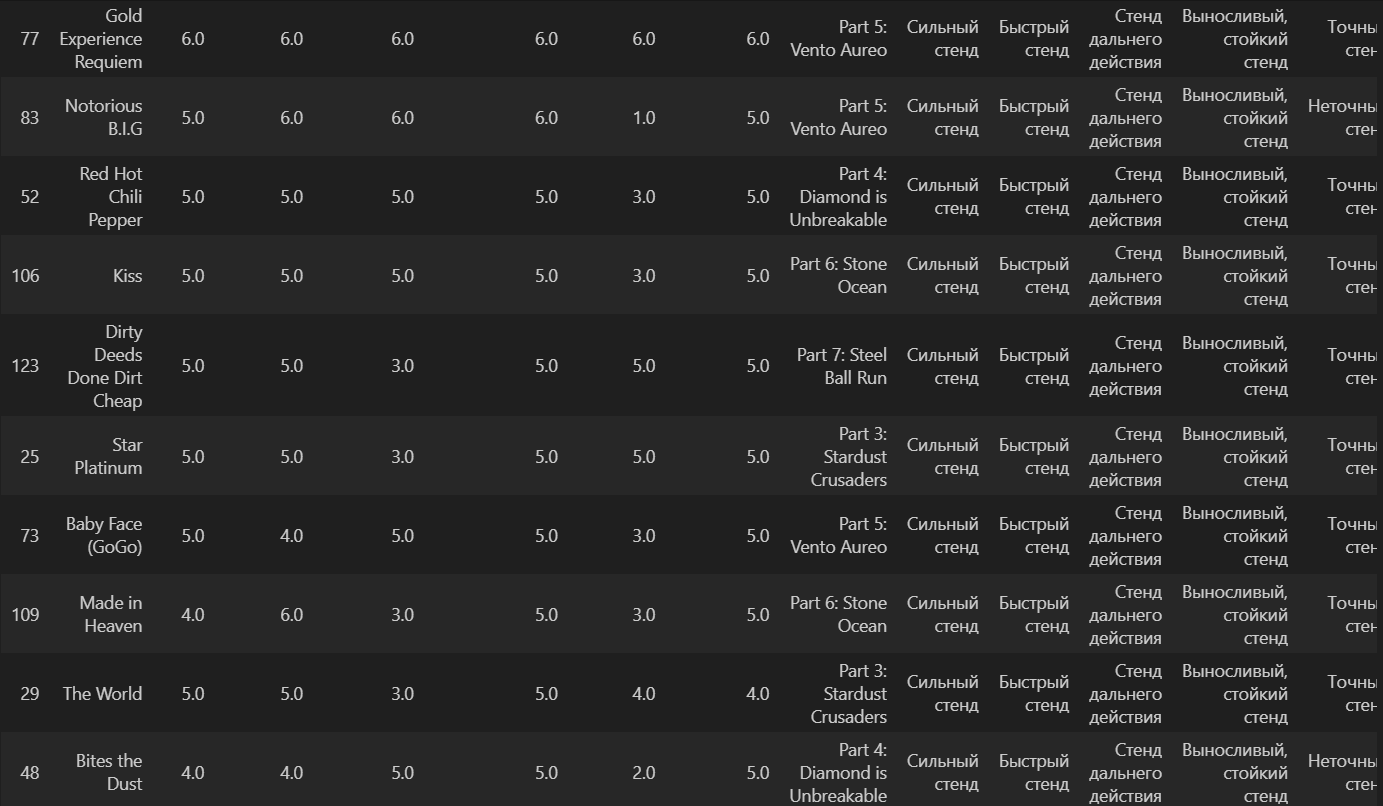

Да, самый сильный оказался **GER**, оно и очевидно

Давайте теперь отобразим все эти 10 стендов на культовой радиальной диаграмме, чтобы было красиво :)

### **1 место -- Gold Experience Requiem**

<p align="center">
    <img src="https://i.pinimg.com/originals/6a/cc/c6/6accc6d646fb378c932fcd2b73e16307.png" alt="Gold Experience Requiem 2" width="300">
</p>

<p align="center">
    <img src="https://steamuserimages-a.akamaihd.net/ugc/5108802431775556322/46F42EC084464AA428E7703388BA664F0A560A9C/?imw=512&amp;imh=287&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true" alt="Gold Experience Requiem 3" width="300">
</p>


In [56]:
GER_stats = begin_dataset[
    begin_dataset['Stand'].str.startswith('Gold Experience Requiem')
]
display(GER_stats)

GER_list = GER_stats[stats_columns].values.tolist()[0]



GER_radar_chart = px.line_polar(r = GER_list, 
                                theta = ['Сила', 'Скорость', 'Дальность', 'Выносливость', 'Точность', 'Потенциал'],
                                line_close=True,
                                color_discrete_sequence=['#f0d70f'],
                                width = 620, 
                                markers=True,
                                )

GER_radar_chart.update_layout(title = {'text': f'Характеристики стенда "Gold Experience Requiem", общий балл {top_stands.iloc[0, 14]}', 'x':  0.5, 'font_color': 'white'}, 
                              paper_bgcolor = '#735404',
                              polar = {'bgcolor': '#a16605', 
                                       'angularaxis': {'color': 'white'},
                                       'radialaxis': {'color': 'white'}},
                              )

GER_radar_chart.update_traces(fill='toself')
GER_radar_chart.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
77,Gold Experience Requiem,6.0,6.0,6.0,6.0,6.0,6.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,6.0


### **2 место -- Notorious B.I.G**


<p align="center">
    <img src="https://i.ytimg.com/vi/qvk0zrIqm4w/maxresdefault.jpg" alt="Да... Страшный стенд" height = "200", width="400">
</p>

In [57]:
Notorius_df = begin_dataset[
    begin_dataset['Stand'] == 'Notorious B.I.G'
]
display(Notorius_df)

Notorius_val = Notorius_df[stats_columns].values.tolist()[0]


Notorius_chart = px.line_polar(r = Notorius_val,
                               theta=stats_columns,
                               line_close=True,
                               markers=True,
                               color_discrete_sequence=['#af5092'],
                               width = 600)
Notorius_chart.update_layout(title = {'text': f'Характеристики стенда "Notorious B.I.G", общий балл {top_stands.iloc[1, 14]}', 'x': 0.5, 'font_color': 'white'},
                             paper_bgcolor = '#d02f39',
                             polar = {'bgcolor': '#f5d2d5',
                                       'angularaxis': {'color': 'white', 'linecolor': 'black', 'gridcolor': '#572c76'},
                                       'radialaxis': {'color': 'black', 'linecolor': 'black', 'gridcolor': '#572c76'}}
                             )
Notorius_chart.update_traces(fill = 'toself')
Notorius_chart.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
83,Notorious B.I.G,5.0,6.0,6.0,6.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,5.35


### **3 место -- Red Hot Chili Pepper**

<p align="center">
    <img src="https://avatars.mds.yandex.net/i?id=d391b2a9949406c5444703a3627584ef_l-4821100-images-thumbs&n=13" alt="Да... Страшный стенд" height = "200", width="400">
</p>

In [58]:
red_hot_pepper_df = begin_dataset[
    begin_dataset['Stand'] == 'Red Hot Chili Pepper'
]

display(red_hot_pepper_df)

red_hot_pepper_val = red_hot_pepper_df[stats_columns].values.tolist()[0]

red_hot_polar = px.line_polar(r = red_hot_pepper_val,
                              theta=stats_columns, 
                              markers=True,
                              line_close=True,
                              width = 600, 
                              color_discrete_sequence=['#f5e60a'],
                              )

red_hot_polar.update_layout(title = {'text': f'Характеристики стенда "Red Hot Chili Pepper", общий балл {top_stands.iloc[2, 14]}', 'x': 0.5, 'font_color': 'white'},
                            paper_bgcolor = '#e4331b',
                            polar = {'bgcolor': '#e4331b',
                                       'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                                       'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
                             )
red_hot_polar.update_traces(fill = 'toself')
red_hot_polar.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
52,Red Hot Chili Pepper,5.0,5.0,5.0,5.0,3.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.9


### **4 место -- Kiss**

<p align="center">
    <img src="https://i.ytimg.com/vi/gPyL5GGy08Q/maxresdefault.jpg" alt="Да... Страшный стенд" height = "250", width="400">
</p>

In [59]:
kiss_params = begin_dataset[
    begin_dataset['Stand'] == 'Kiss'
]
display(kiss_params)


kiss_values = kiss_params[stats_columns].values[0].tolist()

kiss_diag = px.line_polar(r = kiss_values, 
                          theta=stats_columns,
                          line_close = True,
                          markers = True,
                          color_discrete_sequence=['#E5B749'],
                          width = 500)

kiss_diag.update_layout(title = {'text': f'Параметры стенда "Kiss", общий балл {top_stands.iloc[3, 14]}', 'x': 0.5, 'font_color': 'white'},
                        paper_bgcolor = '#BF6753',
                        polar = {'bgcolor': '#D37366',
                            'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                            'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
                            )
kiss_diag.update_traces(fill = 'toself')
kiss_diag.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
106,Kiss,5.0,5.0,5.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.9


### **5 место -- Dirty Deeds Done Dirt Cheap (D4C)**

Я начал читать SBR, но еще не дошел до Валентино, но зато мемы уже знаю про него :)
<br>
Насколько я понял --  у него очень хороший стенд и будет потом интересно посмотреть на него в действии, в манге


DOJYAAAAAAAAAAAAAA~~~~N
<p align="center">
    <img src="https://avatars.mds.yandex.net/i?id=d40691e797e01b552143aa1ea6290632_l-8497211-images-thumbs&n=13" alt="Да... Страшный стенд" height = "250", width="400">
</p>

In [60]:
d4c_stats = begin_dataset[
    begin_dataset['Stand'].str.startswith('Dirty')
]

d4c_vals = d4c_stats[stats_columns].values[0].tolist()
print(d4c_vals)
display(d4c_stats)

d4c_rad_diagram = px.line_polar(r = d4c_vals, 
                                theta=stats_columns,
                                line_close=True,
                                markers=True,
                                color_discrete_sequence=['#FBAEC8'],
                                width = 650)

d4c_rad_diagram.update_layout(title = {'text': f'Характеристики стенда "Dirty Deeds Done Dirt Cheap", общий балл {round(d4c_stats.iloc[0, 14],  2)}', 'x': 0.5, 'font_color': 'white'},
                            paper_bgcolor = '#9E538E',
                            polar = {'bgcolor': '#D86369',
                            'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                            'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
                            )

d4c_rad_diagram.update_traces(fill = 'toself')

d4c_rad_diagram.show()

[5.0, 5.0, 3.0, 5.0, 5.0, 5.0]


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
123,Dirty Deeds Done Dirt Cheap,5.0,5.0,3.0,5.0,5.0,5.0,Part 7: Steel Ball Run,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74


### **6 место -- Star Platinum**

Подошли и к любимчику многих фанатов -- Star Platinum

<p align="center">
    <img src="https://steamuserimages-a.akamaihd.net/ugc/793117738101276486/B4A000C7CF94F0523FB1376D321DDD25430C8058/?imw=512&amp;imh=288&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true
" alt="Да... Страшный стенд" height = "250", width="400">
</p>

In [61]:
star_platinum_stats = top_stands[
    top_stands['Stand'].str.startswith('Star')
]

display(star_platinum_stats)

star_platinum_vals = star_platinum_stats[stats_columns].values[0].tolist()
print(star_platinum_vals)

star_plat_diag = px.line_polar(r = star_platinum_vals, 
                               theta = stats_columns, 
                               markers=True,
                               line_close=True,
                               color_discrete_sequence=['#FBEFBA'],
                               width = 600)
star_plat_diag.update_layout(title = {'text': f'Характеристики стенда "Star Platinum", общий балл {round(star_platinum_stats['Общий балл стенда'].values[0], 2)}', 'x': 0.5, 'font_color': 'white'},
                             paper_bgcolor = '#9A1579',
                             polar = {'bgcolor': '#921CE0',
                            'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                            'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
                            )
star_plat_diag.update_traces(fill = 'toself')
star_plat_diag.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
25,Star Platinum,5.0,5.0,3.0,5.0,5.0,5.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74


[5.0, 5.0, 3.0, 5.0, 5.0, 5.0]


### **7 место -- Baby Face (GoGo)**

Ну... Если вкратце, то владелец этого стенда сначала выбирают хорошую маму, полную сил и энергии, зтем идут такие параметры, как знак зодиака, любимая поза в камасутре и т.п, если кандидатка идеально подошла, то зародыш стенда начинает зарождать в организме матери **САМ ВЛАДЕЛЕЦ НЕ СОВЕРШАЕТ СЕКСУАЛЬНОГО НАСИЛИЯ** и даже после выпуска стенда из организмы матери, женщина даже не поняла, чему она возможно подверглась, для нее это прошло абсолютно безболезненно

<p align="center">
    <img src="
    https://avatars.mds.yandex.net/i?id=2c450703b8ca170de1bdc179918f0b5f_l-5258986-images-thumbs&n=13" alt="Да... Страшный стенд" height = "250", width="400">
</p>

In [62]:
baby_face_stats = top_stands[
    top_stands['Stand'].str.startswith('Baby')
]

baby_face_vals = baby_face_stats[stats_columns].values[0].tolist()

print(baby_face_vals)


baby_face_diag = px.line_polar(r = baby_face_vals, 
                               theta = stats_columns, 
                               markers=True,
                               line_close=True,
                               color_discrete_sequence=['#7C82B6'],
                               width = 600)

baby_face_diag.update_layout(title = {'text': f'Характеристики стенда "Baby Face (GoGo)", общий балл {round(baby_face_stats['Общий балл стенда'].values[0], 2)}', 'x': 0.5},
)

baby_face_diag.update_traces(fill = 'toself')

baby_face_diag.show()

[5.0, 4.0, 5.0, 5.0, 3.0, 5.0]


### **8 место -- Made in Heaven**

Я все таки досмотрел Stone Ocean и хочу сказать, что стенд и вправду сильный, способность безумно ускорять время поистине ужасает

<p align="center">
    <img src="
    https://i.ytimg.com/vi/KRj_9QXJrGE/maxresdefault.jpg" alt="Да... Страшный стенд" height = "250", width="400">
</p>


In [63]:
mdh_stats = top_stands[
    top_stands['Stand'].str.startswith('Made in Heaven')
]
display(mdh_stats)

mdh_vals = mdh_stats[stats_columns].values[0].tolist()

print(mdh_vals)

mdh_diag = px.line_polar(r = mdh_vals, 
                               theta = stats_columns, 
                               markers=True,
                               line_close=True,
                               color_discrete_sequence=['#554D99'],
                               width = 600)

mdh_diag.update_layout(title = {'text': f'Характеристики стенда "Made in Heaven", общий балл {round(mdh_stats["Общий балл стенда"].values[0], 2)}', 'x': 0.5, 'font_color': 'white'},
                        paper_bgcolor = '#E19CCC',
                        polar = {'bgcolor': '#6D86BB',
                            'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                            'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
                            
)

mdh_diag.update_traces(fill = 'toself')

mdh_diag.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
109,Made in Heaven,4.0,6.0,3.0,5.0,3.0,5.0,Part 6: Stone Ocean,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.61


[4.0, 6.0, 3.0, 5.0, 3.0, 5.0]


### **9 место -- The World**

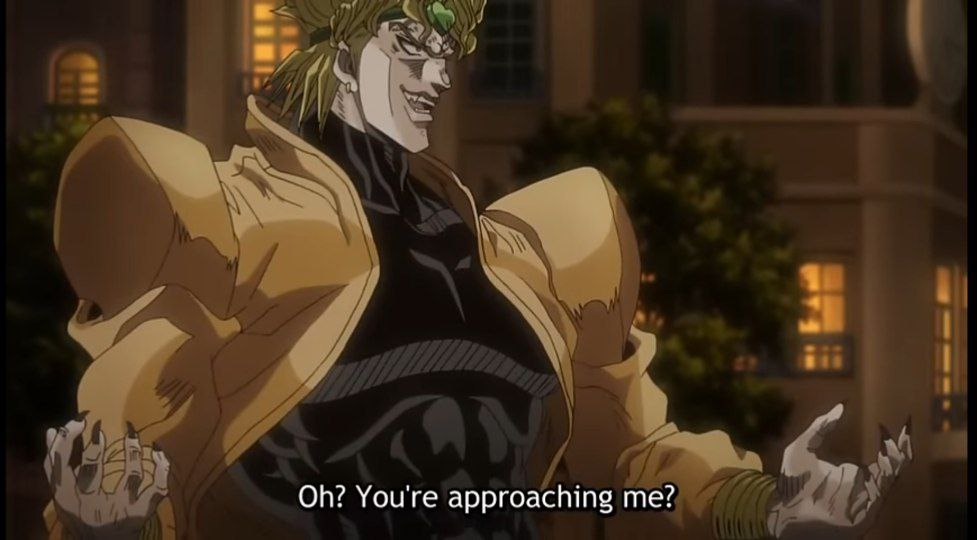


<p align="center">
    <img src="https://steamuserimages-a.akamaihd.net/ugc/306613566909617634/1B36570924FA637B329BAFF21BDFE768B7A576EB/?imw=512&amp;imh=288&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true
    " alt="Да... Страшный стенд" height = "250", width="400">
</p>

In [64]:
world_stats = top_stands[
    top_stands['Stand'].str.startswith('The World')
]
display(world_stats)

world_vals = world_stats[stats_columns].values[0].tolist()
print(world_vals)

world_diag = px.line_polar(r=world_vals,
                           theta=stats_columns,
                           markers=True,
                           line_close=True,
                           color_discrete_sequence=['#FEDCA1'],
                           width=600)

world_diag.update_layout(title={'text': f'Характеристики стенда "The World", общий балл {round(world_stats["Общий балл стенда"].values[0], 2)}',
                                'x': 0.5,
                                'font_color': 'white'},
                         paper_bgcolor='#893B8E',
                         polar={'bgcolor': '#B37545',
                                'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                                'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}})

world_diag.update_traces(fill='toself')
world_diag.show()


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
29,The World,5.0,5.0,3.0,5.0,4.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.49


[5.0, 5.0, 3.0, 5.0, 4.0, 4.0]


### **10 место -- Killer Queen: Bites the Dust**

А вот и мой любимый злодей из всего аниме -- **Кира Йошикаге!**
<br>
Один из самых умных и успешных злодеев, я бы его поставил даже на 2 место после Пуччи, нереально крутой злодей

<p align="center">
    <img src="https://i.ytimg.com/vi/ruWQkQddd7E/maxresdefault.jpg" alt="Да... Страшный стенд" height = "250", width="400">
</p>

<p align="center">
    <img src="https://i.imgur.com/Ir5ujd1.gif" alt="Да... Страшный стенд" height = "250", width="400">
</p>

<p align="center">
    <img src="https://media1.tenor.com/m/X4dBEq7zAcEAAAAd/bites-the-dust-killa-queen.gif" alt="Да... Страшный стенд" height = "250", width="400">
</p>



In [65]:
btd_stats = begin_dataset[
    begin_dataset['Stand'].str.startswith('Bites the Dust')
]
display(btd_stats)

btd_vals = btd_stats[stats_columns].values[0].tolist()
print(btd_vals)

btd_diag = px.line_polar(r=btd_vals,
                         theta=stats_columns,
                         markers=True,
                         line_close=True,
                         color_discrete_sequence=['#E70074'],
                         width=600)

btd_diag.update_layout(title={'text': f'Характеристики стенда "Bites the Dust", общий балл {round(btd_stats["Общий балл стенда"].values[0], 2)}',
                              'x': 0.5,
                              'font_color': 'white'},
                       paper_bgcolor='#D66F8A',
                       polar={'bgcolor': '#C5AE60',
                              'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
                              'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}})

btd_diag.update_traces(fill='toself')
btd_diag.show()


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
48,Bites the Dust,4.0,4.0,5.0,5.0,2.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.48


[4.0, 4.0, 5.0, 5.0, 2.0, 5.0]


## Самые слабые стенды

Выявим же теперь топ 10 самых слабых стендов и не будем особо заострять на них внимание

In [66]:
top_10_weakest_stands = begin_dataset.sort_values('Общий балл стенда').head(10)
display(top_10_weakest_stands)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
113,Survivor,1.0,1.0,1.0,3.0,1.0,1.0,Part 6: Stone Ocean,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,1.50
125,Hey Ya!,1.0,1.0,1.0,4.0,1.0,1.0,Part 7: Steel Ball Run,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,1.75
132,Ticket to Ride,1.0,1.0,1.0,3.0,1.0,3.0,Part 7: Steel Ball Run,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,1.90
145,Paper Moon King,1.0,1.0,3.0,3.0,4.0,1.0,Part 8: JoJolion,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,1.91
130,Sugar Mountain,1.0,1.0,1.0,5.0,1.0,1.0,Part 7: Steel Ball Run,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
53,Super Fly,1.0,1.0,1.0,5.0,1.0,1.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
38,Cheap Trick,1.0,1.0,1.0,5.0,1.0,1.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
82,Mr.President,1.0,1.0,1.0,5.0,1.0,1.0,Part 5: Vento Aureo,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
13,Tohth,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
9,Khnum,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00


# 3 часть -- Stardust Crusaders (Крестоносцы звездной пыли)

Теперь возьмем все стенды с 3 части и сделаем несколько выводов, а именно, определим средние показатели стенда в этой части, а также подразделим всех на команды:

* Джотаро/Джозеф со своей командой
* Команда Дио

Определим, в какой команде обычный, среднестатичтический стенд окажется сильнее

А также сопоставим Джотаро против ДИО и посмотрим, какой стенд все-таки сильнее по характеристикам

In [67]:
display(begin_dataset)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
0,Anubis,4.0,4.0,1.0,5.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.51
1,Atum,2.0,3.0,2.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.67
2,Bastet,1.0,1.0,4.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.39
3,Cream,4.0,4.0,2.0,3.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.04
4,Death Thirteen,3.0,3.0,1.0,4.0,2.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nightbird Flying,1.0,5.0,5.0,5.0,1.0,1.0,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.20
152,Purple Haze Distortion,5.0,4.0,1.0,1.0,3.0,5.0,Light Novel: Purple Haze Feedback,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд,Высокий потенциал,3.21
153,Rainy Day Dream Away,1.0,4.0,5.0,5.0,1.0,1.0,Light Novel: Purple Haze Feedback,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.03
154,Remote Romance,1.0,2.0,6.0,4.0,3.0,1.0,Featured,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,2.67


In [68]:
dataset_part_3 = begin_dataset[
    begin_dataset['Story'].str.startswith('Part 3')
]

display(dataset_part_3)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
0,Anubis,4.0,4.0,1.0,5.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.51
1,Atum,2.0,3.0,2.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.67
2,Bastet,1.0,1.0,4.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.39
3,Cream,4.0,4.0,2.0,3.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.04
4,Death Thirteen,3.0,3.0,1.0,4.0,2.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
5,Geb,3.0,4.0,5.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.43
6,High Priestess,3.0,4.0,5.0,5.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.68
7,Horus,4.0,4.0,2.0,3.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
8,Judgement,4.0,4.0,3.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.37
9,Khnum,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00


Итого у нас здесь 32 стенда, начнем анализ!

## Среднестатистический стенд в 3 части

In [69]:
mean_power_part_3 = dataset_part_3['Сила'].mean()
mean_speed_part_3 = dataset_part_3['Скорость'].mean()
mean_range_part_3 = dataset_part_3['Дальность'].mean()
mean_stamina_part_3 = dataset_part_3['Выносливость'].mean()
mean_accuracy_part_3 = dataset_part_3['Точность'].mean()
mean_potential_part_3 = dataset_part_3['Потенциал'].mean()

part_3_default_stand = px.line_polar(r = [mean_power_part_3, mean_speed_part_3, mean_range_part_3, mean_stamina_part_3, mean_accuracy_part_3, mean_potential_part_3],
                                     theta = dataset_columns, 
                                     line_close = True,
                                     markers = True,
                                     width = 900)
part_3_default_stand.update_layout(title = {'text': f'Среднестатистический стенд в 3 части (Крестоносцы звезной пыли). Средний балл: {round(dataset_part_3['Общий балл стенда'].mean(), 2)}', 'x': 0.5, 'font_color': 'red'})
part_3_default_stand.update_traces(fill = 'toself')
part_3_default_stand.show()

## Команда Джостаров

In [70]:
jojo_team_part3 = dataset_part_3[
    (dataset_part_3['Stand'].str.contains('Hiero')) | (dataset_part_3['Stand'].str.startswith('Star')) |
    (dataset_part_3['Stand'].str.contains('Silver')) | (dataset_part_3['Stand'].str.startswith('Hermit')) |
    (dataset_part_3['Stand'].str.contains('Magi')) | (dataset_part_3['Stand'].str.contains('Fool')) 
]

display(jojo_team_part3)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
19,Hermit Purple,2.0,3.0,2.0,5.0,2.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.72
20,Hierophant Green,3.0,4.0,5.0,4.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.48
23,Magician's Red,4.0,4.0,3.0,4.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.42
24,Silver Chariot,3.0,5.0,3.0,4.0,4.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.64
25,Star Platinum,5.0,5.0,3.0,5.0,5.0,5.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.74
28,The Fool,4.0,3.0,2.0,3.0,2.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.02


### Среднестатистический стнед в команде Джостаров (3 часть)

In [71]:
mean_jojo_power_part_3 = jojo_team_part3['Сила'].mean()
mean_jojo_speed_part_3 = jojo_team_part3['Скорость'].mean()
mean_jojo_range_part_3 = jojo_team_part3['Дальность'].mean()
mean_jojo_stamina_part_3 = jojo_team_part3['Выносливость'].mean()
mean_jojo_accuracy_part_3 = jojo_team_part3['Точность'].mean()
mean_jojo_potential_part_3 = jojo_team_part3['Потенциал'].mean()

standard_jojo3_part_stand = px.line_polar(r = [mean_jojo_power_part_3, mean_jojo_speed_part_3, mean_jojo_range_part_3, mean_jojo_stamina_part_3, mean_jojo_accuracy_part_3, mean_jojo_potential_part_3],
                                          theta = dataset_columns,
                                          line_close = True,
                                          markers = True,
                                          width = 750,
                                          color_discrete_sequence = ['#7507A8'])
standard_jojo3_part_stand.update_traces(fill = 'toself')
standard_jojo3_part_stand.update_layout(title = {'text': f'Среднестатистический стенд в команде Джостаров (3 часть). Общий балл {round(jojo_team_part3['Общий балл стенда'].mean(), 2)}', 'x': 0.5, 'font_color': 'white'},
                                        paper_bgcolor='#04989A',
                                        polar={
                                'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'black'},
                                'radialaxis': {'color': 'white', 'linecolor': 'black', 'gridcolor': 'black'}})
standard_jojo3_part_stand.show()

### Сильный и слабый стенд в группе

Посмотрим теперь на самый сильный и слабый стенд в команде Джостаров

In [72]:
max_stand_jojo3_team = jojo_team_part3[
    jojo_team_part3['Общий балл стенда'] == jojo_team_part3['Общий балл стенда'].max()
]

display(max_stand_jojo3_team['Stand'])

min_stand_jojo3_team = jojo_team_part3[
    jojo_team_part3['Общий балл стенда'] == jojo_team_part3['Общий балл стенда'].min()
]

display(min_stand_jojo3_team['Stand'])

max_stand_jojo3_team_stats = max_stand_jojo3_team[stats_columns]
min_stand_jojo3_team_stats = min_stand_jojo3_team[stats_columns]


25    Star Platinum
Name: Stand, dtype: object

19    Hermit Purple
Name: Stand, dtype: object

Итого, обладтели самого сильного и слабого стендов являются Джостарами :)

Отобразим их на общей диаграмме, чтобы понять разницу между ними

In [73]:
combined_stats = pd.concat([
    max_stand_jojo3_team_stats.assign(Stand='Star Platinum'),
    min_stand_jojo3_team_stats.assign(Stand='Hermit Purple')
])

combined_diagram = px.line_polar(
    combined_stats.melt(id_vars=['Stand'], var_name='Parameter', value_name='Value'),
    r='Value',
    theta='Parameter',
    color='Stand',
    line_close=True,
    markers=True,
    width=700
)

combined_diagram.update_traces(fill='toself')
combined_diagram.update_layout(title={'text': 'Сравнение параметров сильного и слабого стендов в команде Джостаров', 'x': 0.5})
combined_diagram.show()

## Команда ДИО

Теперь посмотрим аналогичную ситуацию с врагами команды Джостаров

In [74]:
jojo_ind = jojo_team_part3.index.values # индексы стендов джо-джо
all_ind = dataset_part_3.index.values # остальные индексы
remain_ind = set(all_ind) - set(jojo_ind) # индексы команды ДИО

dio_team_part3 = dataset_part_3.iloc[list(remain_ind)]
display(dio_team_part3)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
0,Anubis,4.0,4.0,1.0,5.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.51
1,Atum,2.0,3.0,2.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Слабый стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.67
2,Bastet,1.0,1.0,4.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.39
3,Cream,4.0,4.0,2.0,3.0,3.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.04
4,Death Thirteen,3.0,3.0,1.0,4.0,2.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
5,Geb,3.0,4.0,5.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.43
6,High Priestess,3.0,4.0,5.0,5.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.68
7,Horus,4.0,4.0,2.0,3.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
8,Judgement,4.0,4.0,3.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.37
9,Khnum,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00


### Среднестатистический стенд в команде ДИО

In [75]:
display(dio_team_part3.sample(5))

mean_power_dio_team = dio_team_part3['Сила'].mean()
mean_speed_dio_team = dio_team_part3['Скорость'].mean()
mean_range_dio_team = dio_team_part3['Дальность'].mean()
mean_stamina_dio_team = dio_team_part3['Выносливость'].mean()
mean_accuracy_dio_team = dio_team_part3['Точность'].mean()
mean_potential_dio_team = dio_team_part3['Потенциал'].mean()

dio_standard_stand = px.line_polar(r = [mean_power_dio_team, mean_speed_dio_team, mean_range_dio_team, mean_stamina_dio_team, mean_accuracy_dio_team, mean_potential_dio_team],
                                   theta = dataset_columns,
                                   line_close = True,
                                   markers = True,
                                   width = 600,
                                   color_discrete_sequence=['#FF7F27'])

dio_standard_stand.update_traces(fill = 'toself')
dio_standard_stand.update_layout(title = {'text': f'Среднестатистический стенд в команде ДИО. Общий балл {round(dio_team_part3['Общий балл стенда'].mean(), 2)}', 'x': 0.5},
                                 paper_bgcolor = '#FAFF73',
                                 polar={'bgcolor': '#7E84F7',
                                'angularaxis': {'color': 'black', 'linecolor': 'white', 'gridcolor': 'black'},
                                'radialaxis': {'color': 'white', 'linecolor': 'black', 'gridcolor': 'black'}})
dio_standard_stand.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
5,Geb,3.0,4.0,5.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.43
18,Hanged Man,3.0,5.0,5.0,4.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.60
7,Horus,4.0,4.0,2.0,3.0,1.0,3.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.14
6,High Priestess,3.0,4.0,5.0,5.0,2.0,2.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.68
9,Khnum,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00


### Сильный и слабый стенд в команде

In [76]:
#display(dio_team_part3)

max_stand_dio_team_part3 = dio_team_part3[
    dio_team_part3['Общий балл стенда'] == dio_team_part3['Общий балл стенда'].max()
]

min_stand_dio_team_part3 = dio_team_part3[
    dio_team_part3['Общий балл стенда'] == dio_team_part3['Общий балл стенда'].min()
]

display(max_stand_dio_team_part3)
display(min_stand_dio_team_part3)

max_stand_dio_team_part3_stats = max_stand_dio_team_part3[stats_columns]
min_stand_dio_team_part3_stats = min_stand_dio_team_part3[stats_columns]

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
29,The World,5.0,5.0,3.0,5.0,4.0,4.0,Part 3: Stardust Crusaders,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.49


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
9,Khnum,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.0
13,Tohth,1.0,1.0,1.0,5.0,1.0,1.0,Part 3: Stardust Crusaders,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.0


Ну в принципе да, очевидно, что самый сильный стенд будет у **ДИО**, как самый главный злодей во всем аниме (на мой взгляд)
Что насчет слабого стенда, то давайте отобразим только 1, **Tohth**, так как это стенд одного из братьев Оинго и Боинго

In [77]:
combined_stats = pd.concat([
    max_stand_dio_team_part3_stats.assign(Stand='The World'),
    min_stand_dio_team_part3_stats.assign(Stand='Tohth')
])

combined_diagram = px.line_polar(
    combined_stats.melt(id_vars=['Stand'], var_name='Parameter', value_name='Value'),
    r='Value',
    theta='Parameter',
    color='Stand',
    line_close=True,
    markers=True,
    width=700
)

combined_diagram.update_traces(fill='toself')
combined_diagram.update_layout(title={'text': 'Сравнение параметров сильного и слабого стендов в команде ДИО', 'x': 0.5}, legend = {'title': 'Стенды команды ДИО', 'x': 0.9})
combined_diagram.show()

## Команда ДИО против команды Джостаров

In [78]:
jojo_part3 = pd.DataFrame({'Сила': mean_jojo_power_part_3,
                           'Скорость': mean_jojo_power_part_3,
                           'Дальность': mean_jojo_power_part_3,
                           'Выносливость': mean_jojo_power_part_3,
                           'Точность': mean_jojo_power_part_3,
                           'Потенциал': mean_jojo_power_part_3,
                           'Команда': 'Джостары'}, index=[1])

dio_part3 = pd.DataFrame({'Сила': mean_power_dio_team,
                           'Скорость': mean_speed_dio_team,
                           'Дальность': mean_range_dio_team,
                           'Выносливость': mean_stamina_dio_team,
                           'Точность': mean_accuracy_dio_team,
                           'Потенциал': mean_potential_dio_team,
                           'Команда': 'Дио'}, index = [2])

combined_stats = pd.concat([
    jojo_part3,
    dio_part3
])
display(combined_stats)
display(combined_stats.melt(id_vars=['Команда'], var_name='Parameter', value_name='Value'))
combined_diagram = px.line_polar(
    combined_stats.melt(id_vars=['Команда'], var_name='Parameter', value_name='Value'),
    r='Value',
    theta='Parameter',
    color='Команда',
    line_close=True,
    markers=True,
    width=700
)

combined_diagram.update_traces(fill='toself')
combined_diagram.update_layout(title={'text': 'Сравнение параметров стенда команд Джостаров и ДИО', 'x': 0.5}, legend = {'title': 'Команды', 'x': 0.9})
combined_diagram.show()

,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Команда
1,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,Джостары
2,2.666667,2.740741,3.037037,4.296296,1.666667,1.925926,Дио


,Команда,Parameter,Value
0,Джостары,Сила,3.500000
1,Дио,Сила,2.666667
2,Джостары,Скорость,3.500000
3,Дио,Скорость,2.740741
4,Джостары,Дальность,3.500000
5,Дио,Дальность,3.037037
6,Джостары,Выносливость,3.500000
7,Дио,Выносливость,4.296296
8,Джостары,Точность,3.500000
9,Дио,Точность,1.666667


Как можно видеть -- у нас в среднем самый обычный стенд в команде Джостаров в целом сильнее, чем обычный стенд в команде ДИО, так что победы наших героев очень были вероятны :)

# **ПОДПРАВЬ ЭТУ ДИАГРАММУ, ТАМ У ДЖОСТАРОВ НЕВЕРНО ВООБЩЕ!**
**СДЕЛАЙ КРАСИВЫМИ ЦВЕТА У ДИАГРАММ**

## Джотаро против ДИО

Теперь посмотрим, кто же все таки сильнее по характеристикам: Джотаро или ДИО, в аниме победил Джотаро, посмотрим, что нам говорят параметтры

In [79]:
jotaro_df = begin_dataset[
    (begin_dataset['Stand'] == 'Star Platinum') & (begin_dataset['Story'].str.startswith('Part 3'))
]
dio_df = begin_dataset[
    (begin_dataset['Stand'] == 'The World')
]

part_3_powerful_stands = pd.concat([jotaro_df, dio_df])


part_3_powerful_stands = part_3_powerful_stands.melt(id_vars='Stand').iloc[:12]

display(part_3_powerful_stands)

diag_powerful_stands_part_3 = px.line_polar(
   part_3_powerful_stands,
   r = 'value',
   theta = 'variable',
   color = 'Stand',
   line_close = True,
   markers = True,
   color_discrete_sequence = ['#9116FF', '#FFFC11'],
   width = 800
)
diag_powerful_stands_part_3.update_layout(
    title = {'text': 'Сравнение характеристик стендов Джотаро (Star Platinum) и ДИО (The World)', 'x': 0.5},
    legend = {'title': 'Стенды'}
    #paper_bgcolor = '#7AF5FF'
)
diag_powerful_stands_part_3.update_traces(
    fill = 'toself',
)
diag_powerful_stands_part_3.show()

,Stand,variable,value
0,Star Platinum,Сила,5.0
1,The World,Сила,5.0
2,Star Platinum,Скорость,5.0
3,The World,Скорость,5.0
4,Star Platinum,Дальность,3.0
5,The World,Дальность,3.0
6,Star Platinum,Выносливость,5.0
7,The World,Выносливость,5.0
8,Star Platinum,Точность,5.0
9,The World,Точность,4.0


Как видно, Стар Платинум превосходит The World по Точночти и Потенциалу, а все остальные характеристики стендов равны)

Поэтому ставновится понятно, почему все-таки стенд Джотаро один из самых сильных

# 4 часть -- Diamond is Unbreakable (Несокрушимый алмаз)

Теперь перейдем к 4 части

## Среднестатистический стенд 4 части

In [80]:
part_4_df = begin_dataset[
    begin_dataset['Story'].str.startswith('Part 4')
]


default_stand_power_part_4 = part_4_df['Сила'].mean()
default_stand_speed_part_4 = part_4_df['Скорость'].mean()
default_stand_range_part_4 = part_4_df['Дальность'].mean()
default_stand_stamina_part_4 = part_4_df['Выносливость'].mean()
default_stand_accuracy_part_4 = part_4_df['Точность'].mean()
default_stand_potential_part_4 = part_4_df['Потенциал'].mean()

default_stand_diag = px.line_polar(
    r = [default_stand_power_part_4, default_stand_speed_part_4, default_stand_range_part_4,
         default_stand_stamina_part_4, default_stand_accuracy_part_4, default_stand_potential_part_4],
    theta=stats_columns,
    line_close=True,
    markers=True,
    color_discrete_sequence= ['#EBB3BC'],
    width = 800
)
default_stand_diag.update_traces(fill = 'toself')
default_stand_diag.update_layout(
    title = {'text': 'Параметры самого обычного стенда в 4 части', 'x': 0.5, 'font_color': '#EBB3BC'},
    paper_bgcolor = '#24509A',
    polar = {'bgcolor': '#24509A',
                'angularaxis': {'color': '#EBB3BC', 'linecolor': '#EBB3BC', 'gridcolor': '#EBB3BC'},
                'radialaxis': {'color': '#EBB3BC', 'linecolor': '#EBB3BC', 'gridcolor': '#EBB3BC'}}
)
    
default_stand_diag.show()

## Команда Джостаров

In [81]:
part_4_jojo_team = part_4_df[
    (part_4_df['Stand'].str.startswith('Cinderella')) |
    (part_4_df['Stand'].str.startswith('Crazy Diamond')) |
    (part_4_df['Stand'].str.startswith('Harvest')) |
    (part_4_df['Stand'].str.startswith("Heaven's Door")) |
    (part_4_df['Stand'].str.startswith('Harvest')) |
    (part_4_df['Stand'].str.startswith('Highway Star')) |
    (part_4_df['Stand'].str.startswith('The Hand')) |
    (part_4_df['Stand'].str.startswith('Echoes'))|
    (part_4_df['Stand'].str.startswith('Achtung Baby'))|
    (part_4_df['Stand'].str.startswith('Love Deluxe'))|
    (part_4_df['Stand'].str.startswith('Surface'))
]
display(part_4_jojo_team)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
33,Achtung Baby,1.0,1.0,1.0,5.0,1.0,5.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,2.80
39,Cinderella,2.0,3.0,3.0,3.0,5.0,3.0,Part 4: Diamond is Unbreakable,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,2.90
40,Crazy Diamond,5.0,5.0,2.0,4.0,4.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.91
43,Harvest,1.0,4.0,5.0,5.0,1.0,3.0,Part 4: Diamond is Unbreakable,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.43
44,Heaven's Door,2.0,4.0,4.0,4.0,3.0,5.0,Part 4: Diamond is Unbreakable,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.75
45,Highway Star,3.0,4.0,5.0,5.0,1.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.83
49,Love Deluxe,4.0,4.0,3.0,5.0,1.0,4.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.97
54,Surface,4.0,4.0,3.0,4.0,3.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.62
56,The Hand,4.0,4.0,2.0,3.0,3.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.24
57,Echoes (ACT1),1.0,1.0,4.0,4.0,3.0,5.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.04


### Среднестатистический стенд в команде Джостаров

In [82]:
part_4_jojo_team_mean_power = part_4_jojo_team['Сила'].mean()
part_4_jojo_team_mean_speed = part_4_jojo_team['Скорость'].mean()
part_4_jojo_team_mean_range = part_4_jojo_team['Дальность'].mean()
part_4_jojo_team_mean_stamina = part_4_jojo_team['Выносливость'].mean()
part_4_jojo_team_mean_accuracy = part_4_jojo_team['Точность'].mean()
part_4_jojo_team_mean_potentail = part_4_jojo_team['Потенциал'].mean()


part_4_average_stand_jojo = px.line_polar(
    r = [part_4_jojo_team_mean_power, part_4_jojo_team_mean_speed, part_4_jojo_team_mean_range,
         part_4_jojo_team_mean_stamina, part_4_jojo_team_mean_accuracy, part_4_jojo_team_mean_potentail],
    theta = stats_columns,
    markers=True,
    line_close=True,
    color_discrete_sequence = ['#D82455'],
    width = 800
)

part_4_average_stand_jojo.update_traces(fill = 'toself')
part_4_average_stand_jojo.update_layout(title = {'text': 'Характеристики обычного стенда из команды Джоске в 4 части', 'x': 0.5, 'font_color': '#D82455'},
                                        paper_bgcolor = '#223A76',
                                        polar = {'bgcolor': '#223A76',
                'angularaxis': {'color': '#D82455', 'linecolor': '#D82455', 'gridcolor': '#D82455'},
                'radialaxis': {'color': '#D82455', 'linecolor': '#D82455', 'gridcolor': '#D82455'}})

part_4_average_stand_jojo.show()

### Сильный и слабый стенд в команде

In [83]:
max_stand_jojo_part_4_team = part_4_jojo_team[
    part_4_jojo_team['Общий балл стенда'] == max(part_4_jojo_team['Общий балл стенда'])
]
min_stand_jojo_part_4_team = part_4_jojo_team[
    part_4_jojo_team['Общий балл стенда'] == min(part_4_jojo_team['Общий балл стенда'])
]

min_max_jojo_team = pd.concat([min_stand_jojo_part_4_team, max_stand_jojo_part_4_team])

min_max_jojo_team = min_max_jojo_team.melt(id_vars='Stand').iloc[:12]

min_max_stand_diag = px.line_polar(
    min_max_jojo_team,
    r = 'value',
    theta = 'variable',
    color = 'Stand',
    line_close=True,
    color_discrete_sequence=['#DE6276' ,'#008F4C'],
    markers = True,
    width = 800
)

min_max_stand_diag.update_traces(fill = 'toself')
min_max_stand_diag.update_layout(title = {'text': 'Самые сильные и слабые стенды в команде Джоске', 'x': 0.5},
                                 legend = {'title': 'Стенды'})
min_max_stand_diag.show()


Удивительно, оказывается, что **стенд Коичи (Echjes ACT3) -- самый сильный в команде Джоске**, я думал, что это стенд Джоске (Crazy Diamond) или The Hand Окуясу...

А самый слабый это Ahtung Baby, неудивительно, это всего-лишь пока ребенок и он не научился контролировать свой стенд

## Команда Киры Йошикаге

In [84]:
remain_ind = list(set(part_4_df.index) - set(part_4_jojo_team.index))

part_4_kira_team = part_4_df.loc[remain_ind]
display(part_4_kira_team)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
34,Aqua Necklace,3.0,3.0,5.0,5.0,3.0,1.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Низкий потенциал,3.36
35,Atom Heart Father,1.0,1.0,5.0,5.0,1.0,1.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.52
36,Bad Company,4.0,4.0,3.0,4.0,3.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.62
37,Boy II Man,3.0,4.0,4.0,5.0,3.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.80
38,Cheap Trick,1.0,1.0,1.0,5.0,1.0,1.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.00
41,Enigma,1.0,1.0,3.0,5.0,3.0,3.0,Part 4: Diamond is Unbreakable,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,2.76
42,Earth Wind and Fire,3.0,3.0,5.0,5.0,3.0,3.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.76
46,Killer Queen,5.0,4.0,2.0,4.0,4.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.14
47,Sheer Heart Attack,5.0,3.0,5.0,5.0,1.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.46
48,Bites the Dust,4.0,4.0,5.0,5.0,2.0,5.0,Part 4: Diamond is Unbreakable,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.48


### Среднестатистический стенд в команде Киры Йошикаге

In [85]:
mean_power_kira_default_stand = part_4_kira_team['Сила'].mean()
mean_speed_kira_default_stand = part_4_kira_team['Скорость'].mean()
mean_range_kira_default_stand = part_4_kira_team['Дальность'].mean()
mean_stamina_kira_default_stand = part_4_kira_team['Выносливость'].mean()
mean_accuracy_kira_default_stand = part_4_kira_team['Точность'].mean()
mean_potential_kira_default_stand = part_4_kira_team['Потенциал'].mean()


mean_stand_kira_team_diag = px.line_polar(
    r = [mean_power_kira_default_stand, mean_speed_kira_default_stand, mean_range_kira_default_stand,
         mean_stamina_kira_default_stand, mean_accuracy_kira_default_stand, mean_potential_kira_default_stand],
    theta = stats_columns,
    line_close = True,
    markers = True,
    color_discrete_sequence=['#E58F9E'],
    width = 800
)
mean_stand_kira_team_diag.update_traces(fill = 'toself')
mean_stand_kira_team_diag.update_layout(title = {'text': 'Характеристики самого обычного стенда в команде Киры Йошикаге', 'x': 0.5, 'font_color': 'black'},
                                        paper_bgcolor = '#FCE85D',
                                        polar = {'bgcolor': '#FCE85D',
                                        'angularaxis': {'color': 'black', 'linecolor': '#D82455', 'gridcolor': '#D82455'},
                                        'radialaxis': {'color': 'black', 'linecolor': '#D82455', 'gridcolor': '#D82455'}}
)


mean_stand_kira_team_diag.show()

## Самый сильный и слабый стенд в команде Киры

In [86]:
max_stand_kira = part_4_kira_team[
    part_4_kira_team['Общий балл стенда'] == max(part_4_kira_team['Общий балл стенда'])
]

min_stand_kira = part_4_kira_team[
    part_4_kira_team['Общий балл стенда'] == min(part_4_kira_team['Общий балл стенда'])
].iloc[:1]


min_max_stands_kira = pd.concat([max_stand_kira, min_stand_kira])
min_max_stands_kira = min_max_stands_kira.melt(id_vars='Stand').iloc[:12]

display(min_max_stands_kira)

min_max_stand_kira = px.line_polar(
    min_max_stands_kira,
    r = 'value',
    theta = 'variable',
    line_close=True,
    markers=True,
    color = 'Stand',
    width = 800,
    color_discrete_sequence=['#EDAC1A', '#FCEA76']
)
min_max_stand_kira.update_traces(fill = 'toself')
min_max_stand_kira.update_layout(title = {'text': 'Самый сильный и слабый стенды в команде Киры Йошикаге', 'x': 0.5},
                                 legend = {'title': 'Стенды'})
min_max_stand_kira.show()

,Stand,variable,value
0,Red Hot Chili Pepper,Сила,5.0
1,Cheap Trick,Сила,1.0
2,Red Hot Chili Pepper,Скорость,5.0
3,Cheap Trick,Скорость,1.0
4,Red Hot Chili Pepper,Дальность,5.0
5,Cheap Trick,Дальность,1.0
6,Red Hot Chili Pepper,Выносливость,5.0
7,Cheap Trick,Выносливость,5.0
8,Red Hot Chili Pepper,Точность,3.0
9,Cheap Trick,Точность,1.0


Удивительно, но самый сильный стенд не у Киры Йошикаге, а Red Hot Chili Pepper, удивительно...

А про Cheap Trick тут все понятно -- _"ПоКаТаЙ МЕНЯ нА спИИИИнКЕЕЕ"_, жутковатый стенд...

## Команда Джостаров против команды Киры

In [87]:
mean_power_kira_default_stand = part_4_kira_team['Сила'].mean()
mean_speed_kira_default_stand = part_4_kira_team['Скорость'].mean()
mean_range_kira_default_stand = part_4_kira_team['Дальность'].mean()
mean_stamina_kira_default_stand = part_4_kira_team['Выносливость'].mean()
mean_accuracy_kira_default_stand = part_4_kira_team['Точность'].mean()
mean_potential_kira_default_stand = part_4_kira_team['Потенциал'].mean()

Kira_average_stand = pd.DataFrame({'Сила': mean_power_kira_default_stand,
                                   'Скорость': mean_speed_kira_default_stand,
                                   'Дальность': mean_range_kira_default_stand,
                                   'Выносливость': mean_stamina_kira_default_stand,
                                   'Точность': mean_accuracy_kira_default_stand,
                                   'Потенциал': mean_potential_kira_default_stand,
                                   }, index = ['Команда Киры'])

part_4_jojo_team_mean_power = part_4_jojo_team['Сила'].mean()
part_4_jojo_team_mean_speed = part_4_jojo_team['Скорость'].mean()
part_4_jojo_team_mean_range = part_4_jojo_team['Дальность'].mean()
part_4_jojo_team_mean_stamina = part_4_jojo_team['Выносливость'].mean()
part_4_jojo_team_mean_accuracy = part_4_jojo_team['Точность'].mean()
part_4_jojo_team_mean_potentail = part_4_jojo_team['Потенциал'].mean()


JOJO_part_4 = pd.DataFrame({'Сила': part_4_jojo_team_mean_power,
                                   'Скорость': part_4_jojo_team_mean_speed,
                                   'Дальность': part_4_jojo_team_mean_range,
                                   'Выносливость': part_4_jojo_team_mean_stamina,
                                   'Точность': part_4_jojo_team_mean_accuracy,
                                   'Потенциал': part_4_jojo_team_mean_potentail,
                                   }, index = ['Команда Джоске'])

overall_df = pd.concat([Kira_average_stand, JOJO_part_4]).reset_index()
overall_df = overall_df.melt(id_vars='index')

vs_diag = px.line_polar(overall_df,
                        r = 'value',
                        theta = 'variable',
                        line_close=True,
                        markers = True,
                        color = 'index',
                        width = 700,
                        color_discrete_sequence=['#EBB3BC', '#9D2945'])

vs_diag.update_traces(fill = 'toself')
vs_diag.update_layout(title = {'text': 'Средние показатели стендов у команды Джоске и Киры Йошикаге', 'x': 0.5},
                      legend = {'title': 'Команды'})
vs_diag.show()

Из этого графика можно сказать наверняка -- стенды в команде Джоске намного сильнее стендов в команде Киры, но зато стенды в команде Киры намного выносливее и действуют чуть дальше, чем наши герои

## Echoes ACT III vs Red Hot Chilli Pepper

In [88]:
max_stand_jojo_part_4_team = part_4_jojo_team[
    part_4_jojo_team['Общий балл стенда'] == max(part_4_jojo_team['Общий балл стенда'])
]

max_stand_kira = part_4_kira_team[
    part_4_kira_team['Общий балл стенда'] == max(part_4_kira_team['Общий балл стенда'])
]

strongest_part4 = pd.concat([max_stand_jojo_part_4_team, max_stand_kira]).melt(id_vars='Stand').iloc[:12]
 
strongest_diag = px.line_polar(strongest_part4,
                        r = 'value',
                        theta='variable',
                        color = 'Stand',
                        line_close = True,
                        markers = True,
                        color_discrete_sequence=['#009E69', '#EDAA50'],
                        width = 800)

strongest_diag.update_traces(fill = 'toself')
strongest_diag.update_layout(title = {'text': 'Сильные стенды в команде Джоске и Киры Йошикаге', 'x': 0.5},
                             legend = {'title': 'Стенды'})
strongest_diag.show()

Да, все таки Red Hot Chilli Pepper сильнее Echoes, но только не на расстоянии 5 метров :)

## Джоске против Киры Йошикаге

Посомотрим, кто же сильнее: главный ДжоДжо 4 части (Джоске, стенд Crazy Diamond) или Кира Йошикаге (Killer Queen/Bites The Dust/Sheer Heart Attack)

In [89]:
kira_stands = part_4_kira_team[
    part_4_kira_team['Stand'].str.startswith('Killer') |
    part_4_kira_team['Stand'].str.startswith('Sheer') |
    part_4_kira_team['Stand'].str.startswith('Bites')
]
max_kira_stand = kira_stands[
    kira_stands['Общий балл стенда'] == max(kira_stands['Общий балл стенда'])
]

josuke = part_4_jojo_team[
    part_4_jojo_team['Stand'].str.startswith('Crazy')
]

kira_and_josuke = pd.concat([max_kira_stand, josuke]).melt(id_vars='Stand').iloc[:12]


kira_and_josuke_diag = px.line_polar(
    kira_and_josuke,
    r = 'value',
    theta = 'variable',
    line_close=True,
    color = 'Stand',
    color_discrete_sequence=['#F8D500', '#DF6B7C'],
    markers = True,
    width = 800
)
kira_and_josuke_diag.update_traces(fill = 'toself')
kira_and_josuke_diag.update_layout(title = {'text': f'Джоске (Crazy Diamond, балл {josuke['Общий балл стенда'].values[0]}) против Киры (Bites the Dust, балл {round(max_kira_stand['Общий балл стенда'].values[0], 2)})', 'x': 0.5},
                                   legend = {'title': 'Стенд'})
kira_and_josuke_diag.show()

Ну, как видно по графику -- конечно, стенд Киры превосходит стенд Джоске по 3 показателям, одним из которых является потенциал _(а это важно)_

Но тут могу только в оправдание Crazy Diamond сказать, что в бою роль сыграла именно быстрота реакции и сила стенда Джоске, а у Киры Killer Queen был слабее, так что только благодаря этому Джоске и смог победить :)
 

## Злодеи против героев (буду брать из каждой части Джостара против главного злодея и посмотрим, кто бы победил, если смотреть чисто по характеристикам)

# 5 часть -- Golden Wind (Золотой Ветер)

Теперь переходим к самому смаку -- Италия, гангстеры, это все "Золотой ветер"

In [90]:
part_5 = begin_dataset[
    begin_dataset['Story'].str.startswith('Part 5')
]
display(part_5)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
61,Black Sabbath,1.0,5.0,5.0,5.0,1.0,1.0,Part 5: Vento Aureo,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.20
62,Baby Face,5.0,4.0,5.0,5.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.63
63,Gold Experience,3.0,5.0,3.0,2.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Высокий потенциал,3.49
64,Sticky Fingers,5.0,5.0,3.0,2.0,3.0,2.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Низкий потенциал,3.29
65,Metallica,3.0,3.0,3.0,5.0,3.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.50
66,Purple Haze,5.0,4.0,3.0,1.0,1.0,4.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Неточный стенд,Высокий потенциал,3.17
67,Moody Blues,3.0,3.0,5.0,5.0,3.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.76
68,Sex Pistols,1.0,3.0,4.0,5.0,5.0,4.0,Part 5: Vento Aureo,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.53
69,The Grateful Dead,4.0,1.0,4.0,5.0,1.0,3.0,Part 5: Vento Aureo,Сильный стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.39
70,Aerosmith,4.0,4.0,4.0,3.0,1.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.40


## Среднестатистический стенд 5 части

In [91]:
part_5_default_stand_power = part_5['Сила'].mean()
part_5_default_stand_speed = part_5['Скорость'].mean()
part_5_default_stand_range = part_5['Дальность'].mean()
part_5_default_stand_stamina = part_5['Выносливость'].mean()
part_5_default_stand_accuracy = part_5['Точность'].mean()
part_5_default_stand_potential = part_5['Потенциал'].mean()


default_stand_diag = px.line_polar(
    r = [part_5_default_stand_power, part_5_default_stand_speed, part_5_default_stand_range,
         part_5_default_stand_stamina, part_5_default_stand_accuracy, part_5_default_stand_potential],
    theta=stats_columns,
    width = 700,
    line_close = True,
    markers=True,
    color_discrete_sequence=['#FCEA76']
)
default_stand_diag.update_traces(fill = 'toself')
default_stand_diag.update_layout(title = {'text': f'Характеристики самого обычного стенда 5 части, общий балл {round(part_5['Общий балл стенда'].mean(), 2)}', 'x': 0.5, 'font_color': '#D70C7A'},
                                 paper_bgcolor = '#FCEA76',
                                 polar = {'bgcolor': '#BBA30D',
                                          'angularaxis': {'color': '#D70C7A', 'linecolor': '#D70C7A', 'gridcolor': '#D70C7A'},
                                        'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': '#D70C7A'}})
default_stand_diag.show()

Разделим теперь наши стенды на команды: команда убийц (во главе стоит Ризотто Нерро, стенд Metallica), команда Бучеллати (стенд Sticky Fingers) и команда Босса (стенд King Crimson)

## La Squadra Esecuzioni (Команда Убийц)

In [92]:

team_killer = part_5[
    part_5['Stand'].str.startswith('Baby') |
    part_5['Stand'].str.startswith('Metallica') |
    part_5['Stand'].str.startswith('The Gra')   |
    part_5['Stand'].str.startswith('Beach')   |
    part_5['Stand'].str.startswith('Man in t')   |
    part_5['Stand'].str.startswith('The Gra')   |
    part_5['Stand'].str.startswith('White') 
]
display(team_killer)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
62,Baby Face,5.0,4.0,5.0,5.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.63
65,Metallica,3.0,3.0,3.0,5.0,3.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.50
69,The Grateful Dead,4.0,1.0,4.0,5.0,1.0,3.0,Part 5: Vento Aureo,Сильный стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.39
71,Beach Boy,3.0,4.0,4.0,3.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.70
72,Man in the Mirror,3.0,3.0,4.0,2.0,3.0,1.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Низкий потенциал,2.48
73,Baby Face (GoGo),5.0,4.0,5.0,5.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.73
89,White Album,5.0,3.0,3.0,5.0,1.0,1.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.40


#### Среднестатистический стенд в команде убийц

In [93]:
team_killer_power_mean = team_killer['Сила'].mean()
team_killer_speed_mean = team_killer['Скорость'].mean()
team_killer_range_mean = team_killer['Дальность'].mean()
team_killer_stamina_mean = team_killer['Выносливость'].mean()
team_killer_accuracy_mean = team_killer['Точность'].mean()
team_killer_potential_mean = team_killer['Потенциал'].mean()


team_killer_jojo = px.line_polar(
    r = [team_killer_power_mean, team_killer_speed_mean, team_killer_range_mean,
         team_killer_stamina_mean, team_killer_accuracy_mean, team_killer_potential_mean],
    theta = stats_columns,
    width = 800,
    line_close = True,
    markers = True,
    color_discrete_sequence=['#242721']
)

team_killer_jojo.update_layout(title = {'text': f'Средний стенд из команды убийц во главе с Ризотто Нерро, средний балл: {round(team_killer['Общий балл стенда'].mean(), 2)}', 'x': 0.5, 'font_color': 'white'},
                               paper_bgcolor = '#dc5672',
                               polar = {'bgcolor': '#dc5672',
                                        'angularaxis': {'color': 'white'},
                                        'radialaxis': {'color': 'white'}})
team_killer_jojo.update_traces(fill = 'toself')

**В целом самый обычный стенд в команде Ризотто обладает неплохой силой, дальностью и большой выносливостью**

### Самый сильный стенд и слабый стенд в команде

In [94]:

max_stand_killer = team_killer[
    team_killer['Общий балл стенда'] == max(team_killer['Общий балл стенда'])
]

min_stand_killer = team_killer[
    team_killer['Общий балл стенда'] == min(team_killer['Общий балл стенда'])
]


min_max_stands_killer = pd.concat([min_stand_killer, max_stand_killer]).iloc[:2]

display(min_max_stands_killer)

min_max_stands_killer = min_max_stands_killer.melt(id_vars = 'Stand').iloc[:12]

display(min_max_stands_killer)

min_max_stands_killer_diag = px.line_polar(min_max_stands_killer,
                                           r = 'value',
                                           theta = 'variable',
                                           line_close = True,
                                           markers = True,
                                           color = 'Stand',
                                           color_discrete_sequence=['#fee500', '#1a4784'],
                                           width = 800)

min_max_stands_killer_diag.update_layout(title = {'text': 'Самый сильный и слабый стенд в команде убийц', 'x': 0.5, 'font_color': 'white'},
                                        paper_bgcolor = '#dc5672',
                                        polar = {'bgcolor': '#dc5672',
                                                 'angularaxis': {'color': 'white'},
                                                 'radialaxis': {'color': 'white'}},
                                        legend = {'title': 'Стенды', 'font_color': 'white'})

min_max_stands_killer_diag.update_traces(fill = 'toself')
min_max_stands_killer_diag.show()

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
72,Man in the Mirror,3.0,3.0,4.0,2.0,3.0,1.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Низкий потенциал,2.48
73,Baby Face (GoGo),5.0,4.0,5.0,5.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,4.73


,Stand,variable,value
0,Man in the Mirror,Сила,3.0
1,Baby Face (GoGo),Сила,5.0
2,Man in the Mirror,Скорость,3.0
3,Baby Face (GoGo),Скорость,4.0
4,Man in the Mirror,Дальность,4.0
5,Baby Face (GoGo),Дальность,5.0
6,Man in the Mirror,Выносливость,2.0
7,Baby Face (GoGo),Выносливость,5.0
8,Man in the Mirror,Точность,3.0
9,Baby Face (GoGo),Точность,3.0


Да, самый сильный стенд в команде убийц оказался **Baby Face**, тут неуудивительно, тут все зависит от матери владельца, как уже и было в анализе в топ 10 сильнейших стендов. Про **"Man in the Mirror"** могу сказать, что он только может заманивать обладателей стенда в зеркало, но сам по себе очень слабый

## Команда Босса (Телохранители)

In [95]:
team_boss = part_5[
    part_5['Stand'].str.startswith('Clash') |
    part_5['Stand'].str.startswith('Green')   |
    part_5['Stand'].str.startswith('King') |
    part_5['Stand'].str.startswith('Kraf') |
    part_5['Stand'].str.startswith('Notorio') |
    part_5['Stand'].str.startswith('Oasis') |
    part_5['Stand'].str.startswith('Soft') |
    part_5['Stand'].str.startswith('Talking')
]
display(team_boss)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
75,Clash,2.0,5.0,4.0,5.0,5.0,3.0,Part 5: Vento Aureo,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.87
78,Green Day,5.0,3.0,5.0,5.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.46
79,King Crimson,5.0,5.0,1.0,1.0,5.0,4.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд ближнего боя,Стенд довольно уязвимый,Точный стенд,Высокий потенциал,3.28
80,Kraft Work,5.0,5.0,1.0,3.0,1.0,1.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.98
83,Notorious B.I.G,5.0,6.0,6.0,6.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,5.35
84,Oasis,5.0,5.0,4.0,5.0,1.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,4.27
86,Soft Machine,5.0,3.0,1.0,5.0,2.0,1.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд ближнего боя,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,3.19
88,Talking Head,1.0,1.0,4.0,5.0,1.0,1.0,Part 5: Vento Aureo,Слабый стенд,Медленный стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Низкий потенциал,2.39


### Среднестатистический стенд в команде Босса

In [96]:
mean_power_boss_team = team_boss['Сила'].mean()
mean_speed_boss_team = team_boss['Скорость'].mean()
mean_range_boss_team = team_boss['Дальность'].mean()
mean_stamina_boss_team = team_boss['Выносливость'].mean()
mean_accuracy_boss_team = team_boss['Точность'].mean()
mean_potential_boss_team = team_boss['Потенциал'].mean()

mean_boss_team_jojo = px.line_polar(
    r = [mean_power_boss_team, mean_speed_boss_team, mean_range_boss_team,
         mean_stamina_boss_team, mean_accuracy_boss_team, mean_potential_boss_team],
    theta = stats_columns,
    line_close = True,
    markers = True,
    color_discrete_sequence=['#d82455'],
    width = 800)

mean_boss_team_jojo.update_layout(title = {'text': f'Средний стенд из команды Босса, средний балл: {round(team_boss['Общий балл стенда'].mean(), 2)}', 'x': 0.5})

mean_boss_team_jojo.update_traces(fill = 'toself')

mean_boss_team_jojo.show()

**В целом, самый обычный стенд у телохранителя босса обладает очень внушительной силой силой, скоростью и огромной выносливостью, но зато точность и потенциал очень низкие**

### Самый сильный и слабый стенд в команде Дьяволо

In [97]:
min_stand_boss = team_boss[
    team_boss['Общий балл стенда'] == min(team_boss['Общий балл стенда'])
]

max_stand_boss = team_boss[
    team_boss['Общий балл стенда'] == max(team_boss['Общий балл стенда'])
]


overall_df_boss = pd.concat([min_stand_boss, max_stand_boss])

overall_df_boss = overall_df_boss.melt(id_vars = 'Stand').iloc[:12]
display(overall_df_boss)

min_max_stand = px.line_polar(
    overall_df_boss,
    r = 'value',
    theta = 'variable',
    line_close = True,
    markers = True,
    color = 'Stand',
    color_discrete_sequence=['#d82455', '#2b74b7'],
    width = 800
)

min_max_stand.update_layout(title = {'text': 'Самый сильный и слабый стенд в команде Дьяволо', 'x': 0.5},
                            legend = {'title': 'Стенд'})

min_max_stand.update_traces(fill = 'toself')
min_max_stand.show()


,Stand,variable,value
0,Talking Head,Сила,1.0
1,Notorious B.I.G,Сила,5.0
2,Talking Head,Скорость,1.0
3,Notorious B.I.G,Скорость,6.0
4,Talking Head,Дальность,4.0
5,Notorious B.I.G,Дальность,6.0
6,Talking Head,Выносливость,5.0
7,Notorious B.I.G,Выносливость,6.0
8,Talking Head,Точность,1.0
9,Notorious B.I.G,Точность,1.0


Как видно, у нас самый сильный здесь **Notorious B.I.G**, самый сильный стенд после GER, а также один из самых слабых является **"Talking Head"**, который заставляет говорить человека неправду и только, опасная штука на самом деле...

## Команда Бучеллати

In [98]:
team_buchellati = part_5[
    part_5['Stand'].str.startswith('Gold') |
    part_5['Stand'].str.startswith('Sticky')   |
    part_5['Stand'].str.startswith('Purple') |
    part_5['Stand'].str.startswith('Moody ') |
    part_5['Stand'].str.startswith('Sex') |
    part_5['Stand'].str.startswith('Aero')
]
display(team_buchellati)

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
63,Gold Experience,3.0,5.0,3.0,2.0,3.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Высокий потенциал,3.49
64,Sticky Fingers,5.0,5.0,3.0,2.0,3.0,2.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Точный стенд,Низкий потенциал,3.29
66,Purple Haze,5.0,4.0,3.0,1.0,1.0,4.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,Стенд довольно уязвимый,Неточный стенд,Высокий потенциал,3.17
67,Moody Blues,3.0,3.0,5.0,5.0,3.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.76
68,Sex Pistols,1.0,3.0,4.0,5.0,5.0,4.0,Part 5: Vento Aureo,Слабый стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,3.53
70,Aerosmith,4.0,4.0,4.0,3.0,1.0,3.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,3.40
77,Gold Experience Requiem,6.0,6.0,6.0,6.0,6.0,6.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,6.00


### Среднестатистический стенд команды Буччелати

In [99]:
buc_stand_power = team_buchellati['Сила'].mean()

buc_stand_speed = team_buchellati['Скорость'].mean()

buc_stand_range = team_buchellati['Дальность'].mean()

buc_stand_stamina = team_buchellati['Выносливость'].mean()

buc_stand_accuracy = team_buchellati['Точность'].mean()

buc_stand_potential = team_buchellati['Потенциал'].mean()

buc_stand_jojo = px.line_polar(
    r = [buc_stand_power, buc_stand_speed, buc_stand_range,
         buc_stand_stamina, buc_stand_accuracy, buc_stand_potential],
    theta = stats_columns,
    line_close = True,
    markers = True,
    color_discrete_sequence=['#f8d500'],
    width = 800)

buc_stand_jojo.update_layout(title = {'text': f'Средний стенд из команды Буччелати, средний балл: {round(team_buchellati['Общий балл стенда'].mean(), 2)}', 'x': 0.5, 'font_color': 'white'},
                             paper_bgcolor = '#2b74b7',
                             polar = {'bgcolor': '#2b74b7',
                                      'angularaxis': {'color': 'white'},
                                      'radialaxis': {'color': 'white'}})

buc_stand_jojo.update_traces(fill = 'toself')

buc_stand_jojo.show()


**В целом по графику видно, что самый обычный стенд из коанды Буччелати имеет высокую дальность и очень большую скорость, а в освном все параметры средние и равны 3**

### Самый сильный и слабый стенд в команде

In [100]:
min_stand = team_buchellati[
    team_buchellati['Общий балл стенда'] == min(team_buchellati['Общий балл стенда'])
]


max_stand = team_buchellati[
    team_buchellati['Общий балл стенда'] == max(team_buchellati['Общий балл стенда'])
]


overall_df = pd.concat([min_stand, max_stand])

overall_df = overall_df.melt(id_vars = 'Stand').iloc[:12]

min_max_stand = px.line_polar(
    overall_df,
    r = 'value',
    theta = 'variable',
    line_close = True,
    markers = True,
    color = 'Stand',
    color_discrete_sequence=['#942d83', '#fee500'],
    width = 800)

min_max_stand.update_layout(title = {'text': 'Самый сильный и слабый стенд в команде Буччелати', 'x': 0.5, 'font_color': 'white'},
                            legend = {'title': 'Стенд', 'font_color': 'white'},
                            paper_bgcolor = '#5c8dc6',
                            polar = {"bgcolor": '#5c8dc6',
                                     'angularaxis': {'color': 'white'},
                                     'radialaxis': {'color': 'white'}},)

min_max_stand.update_traces(fill = 'toself')

min_max_stand.show()

Самый сильный стенд оказался, естественно, **Gold Experience Requiem**, а самый слабый -- **Purple Haze**, но сила и потенциал у него неплохие, к слову, а вирус и правда опасная штука 

## Все против всех!

### Средние стенды из каждой команды

Рассмотрим, какая же команда самая сильная -- телохранители Босса, команда Бучеллати или команда убийц

In [101]:
buc_stand_power = team_buchellati['Сила'].mean()
buc_stand_speed = team_buchellati['Скорость'].mean()
buc_stand_range = team_buchellati['Дальность'].mean()
buc_stand_stamina = team_buchellati['Выносливость'].mean()
buc_stand_accuracy = team_buchellati['Точность'].mean()
buc_stand_potential = team_buchellati['Потенциал'].mean()

team_killer_power_mean = team_killer['Сила'].mean()
team_killer_speed_mean = team_killer['Скорость'].mean()
team_killer_range_mean = team_killer['Дальность'].mean()
team_killer_stamina_mean = team_killer['Выносливость'].mean()
team_killer_accuracy_mean = team_killer['Точность'].mean()
team_killer_potential_mean = team_killer['Потенциал'].mean()

mean_power_boss_team = team_boss['Сила'].mean()
mean_speed_boss_team = team_boss['Скорость'].mean()
mean_range_boss_team = team_boss['Дальность'].mean()
mean_stamina_boss_team = team_boss['Выносливость'].mean()
mean_accuracy_boss_team = team_boss['Точность'].mean()
mean_potential_boss_team = team_boss['Потенциал'].mean()

boss_stats = [mean_power_boss_team, mean_speed_boss_team, mean_range_boss_team, mean_stamina_boss_team, mean_accuracy_boss_team, mean_potential_boss_team]
squadra_stats = [team_killer_power_mean, team_killer_speed_mean, team_killer_range_mean, team_killer_stamina_mean, team_killer_accuracy_mean, team_killer_potential_mean]
buccelati_stats = [buc_stand_power, buc_stand_speed, buc_stand_range, buc_stand_stamina, buc_stand_accuracy, buc_stand_potential]

diavollo_df = pd.DataFrame({'Boss': boss_stats},
                          index = stats_columns)

squadra_df = pd.DataFrame({'killer': squadra_stats},
                          index = stats_columns)

bucellati_df = pd.DataFrame({'Buc': buccelati_stats},
                            index = stats_columns)

overall_df = pd.concat([diavollo_df, squadra_df, bucellati_df]).reset_index()
overall_df.index = ['Команда Дьяволо, средний балл: 3.72'] * 6 + ['La Squadra (команда Ризотто Нерро), средний балл: 3.7'] * 6 + ['Команда Бучеллати, средний балл: 3.81'] * 6
overall_df.reset_index(inplace=True)
overall_df.rename(columns = {'level_0': 'Команда', 'index': 'Параметры', 'Boss': 'Значения'}, inplace = True)

def concat_into_one(row):
    if pd.isna(row['Значения']) and pd.isna(row['killer']):
        row['Значения'] = row['Buc']
    elif pd.isna(row['Значения']) and pd.isna(row['Buc']):
        row['Значения'] = row['killer']
    return row['Значения']

overall_df['Значения'] = overall_df.apply(concat_into_one, axis = 1)
overall_df.drop(columns = ['killer', 'Buc'], inplace = True)
display(overall_df)


,Команда,Параметры,Значения
0,"Команда Дьяволо, средний балл: 3.72",Сила,4.125000
1,"Команда Дьяволо, средний балл: 3.72",Скорость,4.125000
2,"Команда Дьяволо, средний балл: 3.72",Дальность,3.250000
3,"Команда Дьяволо, средний балл: 3.72",Выносливость,4.375000
4,"Команда Дьяволо, средний балл: 3.72",Точность,2.125000
5,"Команда Дьяволо, средний балл: 3.72",Потенциал,2.875000
6,"La Squadra (команда Ризотто Нерро), средний ба...",Сила,4.000000
7,"La Squadra (команда Ризотто Нерро), средний ба...",Скорость,3.142857
8,"La Squadra (команда Ризотто Нерро), средний ба...",Дальность,4.000000
9,"La Squadra (команда Ризотто Нерро), средний ба...",Выносливость,4.285714


In [102]:
all_vs_all_diag = px.line_polar(
    overall_df,
    r = 'Значения',
    theta = 'Параметры',
    line_close = True,
    markers = True,
    color = 'Команда',
    color_discrete_sequence=['#d70c7a', '#282932', '#70a7d0'],
    width = 900
)

all_vs_all_diag.update_layout(title = {'text': 'Телохранители Дьяволло против команды Бучеллати против команды Ризотто Нерро', 'x': 0.5, 'font_color': 'black'},
                            legend = {'title': 'Команда', 'font_color': 'black'},
                            paper_bgcolor = '#fcea76',
                            polar = {"bgcolor": '#fcea76',
                                      'angularaxis': {'color': 'black', 'linecolor': 'black', 'gridcolor': 'black'},
                                     'radialaxis': {'color': 'black', 'linecolor': 'black', 'gridcolor': 'black'}})

all_vs_all_diag.update_traces(fill = 'toself')

all_vs_all_diag.show()



Как видно, в среднем команда Бучеллати оказалась самой сильной, и правда могущественная команда, прямо как рыцари крестносной пыли (команда Джотаро из 3 части)

### Сильные стенды из каждой команды

Теперь возьмем самые сильные стенды из каждой команды и сравним их друг с другом

In [103]:
max_stand_killer = team_killer[
    team_killer['Общий балл стенда'] == max(team_killer['Общий балл стенда'])
].iloc[0, :]

max_stand_boss = team_boss[
    team_boss['Общий балл стенда'] == max(team_boss['Общий балл стенда'])
]

max_stand_buchelati = team_buchellati[
    team_buchellati['Общий балл стенда'] == max(team_buchellati['Общий балл стенда'])
]
display(max_stand_killer)
display(max_stand_boss)
display(max_stand_buchelati)

Stand                         Baby Face (GoGo)
Сила                                       5.0
Скорость                                   4.0
Дальность                                  5.0
Выносливость                               5.0
Точность                                   3.0
Потенциал                                  5.0
Story                      Part 5: Vento Aureo
strong                           Сильный стенд
speed                            Быстрый стенд
range                  Стенд дальнего действия
stamina              Выносливый, стойкий стенд
accuracy                          Точный стенд
potential                    Высокий потенциал
Общий балл стенда                         4.73
Name: 73, dtype: object

,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
83,Notorious B.I.G,5.0,6.0,6.0,6.0,1.0,5.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Неточный стенд,Высокий потенциал,5.35


,Stand,Сила,Скорость,Дальность,Выносливость,Точность,Потенциал,Story,strong,speed,range,stamina,accuracy,potential,Общий балл стенда
77,Gold Experience Requiem,6.0,6.0,6.0,6.0,6.0,6.0,Part 5: Vento Aureo,Сильный стенд,Быстрый стенд,Стенд дальнего действия,"Выносливый, стойкий стенд",Точный стенд,Высокий потенциал,6.0


In [115]:

max_stand_killer = team_killer[team_killer['Общий балл стенда'] == max(team_killer['Общий балл стенда'])].iloc[0, :]
max_stand_boss = team_boss[team_boss['Общий балл стенда'] == max(team_boss['Общий балл стенда'])]
max_stand_buchelati = team_buchellati[team_buchellati['Общий балл стенда'] == max(team_buchellati['Общий балл стенда'])]


killer_stats = [
    max_stand_killer['Сила'],
    max_stand_killer['Скорость'],
    max_stand_killer['Дальность'],
    max_stand_killer['Выносливость'],
    max_stand_killer['Точность'],
    max_stand_killer['Потенциал']
]

boss_stats = [
    max_stand_boss['Сила'].values[0],
    max_stand_boss['Скорость'].values[0],
    max_stand_boss['Дальность'].values[0],
    max_stand_boss['Выносливость'].values[0],
    max_stand_boss['Точность'].values[0],
    max_stand_boss['Потенциал'].values[0]
]

buccelati_stats = [
    max_stand_buchelati['Сила'].values[0],
    max_stand_buchelati['Скорость'].values[0],
    max_stand_buchelati['Дальность'].values[0],
    max_stand_buchelati['Выносливость'].values[0],
    max_stand_buchelati['Точность'].values[0],
    max_stand_buchelati['Потенциал'].values[0]
]



diavollo_df = pd.DataFrame({'Boss': boss_stats}, index=stats_columns)
squadra_df = pd.DataFrame({'killer': killer_stats}, index=stats_columns)
bucellati_df = pd.DataFrame({'Buc': buccelati_stats}, index=stats_columns)


overall_df = pd.concat([diavollo_df, squadra_df, bucellati_df]).reset_index()


overall_df.index = ['Команда Дьяволо, Notorious B.I.G'] * 6 + ['La Squadra (Ризотто Нерро), Baby Face'] * 6 + ['Команда Бучеллати, Gold Experience Requiem'] * 6
overall_df.reset_index(inplace=True)
overall_df.rename(columns={'level_0': 'Команда', 'index': 'Параметры', 'Boss': 'Значения'}, inplace=True)


def concat_into_one(row):
    if pd.isna(row['Значения']) and pd.isna(row['killer']):
        row['Значения'] = row['Buc']
    elif pd.isna(row['Значения']) and pd.isna(row['Buc']):
        row['Значения'] = row['killer']
    return row['Значения']

overall_df['Значения'] = overall_df.apply(concat_into_one, axis=1)
overall_df.drop(columns=['killer', 'Buc'], inplace=True)


all_vs_all_diag = px.line_polar(
    overall_df,
    r='Значения',
    theta='Параметры',
    line_close=True,
    markers=True,
    color='Команда',
    color_discrete_sequence=['#e79ca6', '#a9c7e5', '#f5cb08'],
    width=1000
)

all_vs_all_diag.update_layout(
    title={'text': 'Самые сильные стенды команды Дьяволо против команды Бучеллати против команды Ризотто Нерро', 'x': 0.5, 'font_color': 'white'},
    legend={'title': 'Команда', 'font_color': 'white'},
    paper_bgcolor='#af1c63',
    polar={"bgcolor": '#af1c63',
           'angularaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'},
           'radialaxis': {'color': 'white', 'linecolor': 'white', 'gridcolor': 'white'}}
)

all_vs_all_diag.update_traces(fill='toself')


all_vs_all_diag.show()


Ну да, очевидно, что Gold Experience Requiem оказался самым сильным среди всех стендов с этих 3 команд)

# Определи, в каких частях в среднем стенды сильнее, чем в других (то есть просто разбаловку сделай по каждой части и все) и проведи AB тетсирование

# Построй карту, где проходили части

# Разбей всех на фракции и в каждой части и сделай их анализ

# Выведи 5 слабейших стендов

# Проведи AB тестирование между стендами из каждых частей (парные тесты для команд) проведи еще также ANOVA тесст!

# Выведи самых главных злодеев и сделай их топ, также и с героями

# Сделай ссылку на фотку и вики с персом

# Выводы


Большинство стендов обладают огромной силой, очень стойкие, быстрые, обладающие высоким потенциалом и к тому же еще и дальнего действия, но больше половины стендов имеют низкую точность

Самый сильный стенд всех времен и народов -- GER (Gold Experience Requiem)